<a href="https://colab.research.google.com/github/ashishsingh752/SolarEnergyPredictionUsingML/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.style.use('default')
import matplotlib.dates as mdates  # Import for date formatting in plots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

Define the constant for the solar power calculation

In [ ]:
# Constants for the formula
PV_rating = 1  # PV rating in kW
P_STC = 1  # Nominal PV power under standard conditions (kW)
F_PV = 0.8  # PV derating factor
G_STC = 1  # Solar radiation under STC (kW/m²)
T_STC = 25  # Temperature under STC (°C)
C_T = -0.0011  # Temperature coefficient of power (for a-Si, °C)
NOCT = 45  # Normal Operating Cell Temperature (°C)

Importing the Dataset

In [ ]:
# Step 1: Load the CSV data
data = pd.read_csv('/content/weatherPara.csv')

# Combine 'Date' and 'Time' columns into a single 'DATE_TIME' column
# data['DATE_TIME'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d-%m-%Y %H:%M')

In [ ]:
# Step 2: Data Preprocessing
# Select relevant features
features = ['Temperature', 'SolarRadiation','WindSpeed', 'PCP1', 'PCP2', 'PCP3', 'PCP4', 'PCP5', 'PCP6', 'PCP7', 'PCP8', 'PCP9', 'PCP10']
target = ['Solar Energy']

X = data[features]
y = data[target]

# Convert features to numeric, coercing errors to NaN
X[features] = X[features].apply(pd.to_numeric, errors='coerce')
y[target] = y[target].apply(pd.to_numeric, errors='coerce')

# Handle missing values
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)


<ipython-input-7-07c1cbc17626>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[features] = X[features].apply(pd.to_numeric, errors='coerce')
<ipython-input-7-07c1cbc17626>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[target] = y[target].apply(pd.to_numeric, errors='coerce')
<ipython-input-7-07c1cbc17626>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [ ]:
# Step 3: Add PV power generation formula
# Calculate cell temperature (T_C)
data['T_C'] = data['Temperature'] + (NOCT - 20) * (data['SolarRadiation'] / G_STC)

# Calculate PV power using the formula
data['P_PV'] =(PV_rating * P_STC * F_PV * (data['SolarRadiation'] / G_STC) *
               (1 + (data['T_C'] - T_STC) * C_T)) / 1000


In [ ]:
# Use the calculated PV power as the target variable
y = data[['P_PV']]


In [ ]:
# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 5: Normalize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

Forecasting the Weather Parameter

In [ ]:
# Step 6: Build individual models for each weather parameter
# Model for Temperature ('Temperature')
model_temp = Sequential()
model_temp.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_temp.add(Dropout(0.2))
model_temp.add(Dense(64, activation='relu'))
model_temp.add(Dropout(0.2))
model_temp.add(Dense(32, activation='relu'))
model_temp.add(Dense(1, activation='linear'))
model_temp.compile(optimizer=Adam(), loss='mse', metrics=['mse'])
model_temp.fit(X_train_scaled, X_train['Temperature'], epochs=50, batch_size=32, validation_data=(X_test_scaled, X_test['Temperature']))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


607/607 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 200.9609 - mse: 200.9609 - val_loss: 5.4292 - val_mse: 5.4292
Epoch 2/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 10.8545 - mse: 10.8545 - val_loss: 1.1226 - val_mse: 1.1226
Epoch 3/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.6346 - mse: 6.6346 - val_loss: 0.3369 - val_mse: 0.3369
Epoch 4/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.4513 - mse: 5.4513 - val_loss: 1.0888 - val_mse: 1.0888
Epoch 5/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.3265 - mse: 4.3265 - val_loss: 0.8125 - val_mse: 0.8125
Epoch 6/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.5950 - mse: 3.5950 - val_loss: 0.8195 - val_mse: 0.8195
Epoch 7/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.1327 - mse: 3.1327 - val_loss: 0.3414 - val_mse: 0.3414
Epoch 8/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.5724 - mse: 2.5724 - val_loss: 0.7813 - val_mse: 0.7813
Epoch 9/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2

In [ ]:
# Model for Solar Radiation ('SolarRadiation')
model_rad = Sequential()
model_rad.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_rad.add(Dropout(0.2))
model_rad.add(Dense(64, activation='relu'))
model_rad.add(Dropout(0.2))
model_rad.add(Dense(32, activation='relu'))
model_rad.add(Dropout(0.2))
model_rad.add(Dense(16, activation='relu'))
model_rad.add(Dense(1, activation='relu'))
model_rad.compile(optimizer=Adam(), loss='mse', metrics=['mse'])
model_rad.fit(X_train_scaled, X_train['SolarRadiation'], epochs=50, batch_size=32, validation_data=(X_test_scaled, X_test['SolarRadiation']))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 71703.4219 - mse: 71703.4219 - val_loss: 300.5418 - val_mse: 300.5418
Epoch 2/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3479.4700 - mse: 3479.4700 - val_loss: 169.3634 - val_mse: 169.3634
Epoch 3/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3077.6077 - mse: 3077.6077 - val_loss: 188.3985 - val_mse: 188.3985
Epoch 4/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2900.1392 - mse: 2900.1392 - val_loss: 125.3694 - val_mse: 125.3694
Epoch 5/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2934.4253 - mse: 2934.4253 - val_loss: 409.8390 - val_mse: 409.8390
Epoch 6/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2765.4993 - mse: 2765.4993 - val_loss: 1128.0498 - val_mse: 1128.0498
Epoch 7/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2799.6191 - mse: 2799.6191 - val_loss: 733.4243 - val_mse: 733.4243
Epoch 8/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2511.9417 - mse: 2511.9417 - val_loss: 1

In [ ]:
# Model for Wind Speed ('Wind Speed')
model_wind = Sequential()
model_wind.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_wind.add(Dropout(0.2))
model_wind.add(Dense(64, activation='relu'))
model_wind.add(Dropout(0.2))
model_wind.add(Dense(32, activation='relu'))
model_wind.add(Dense(1, activation='linear'))
model_wind.compile(optimizer=Adam(), loss='mse', metrics=['mse'])
model_wind.fit(X_train_scaled, X_train['WindSpeed'], epochs=50, batch_size=32, validation_data=(X_test_scaled, X_test['WindSpeed']))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 13.5167 - mse: 13.5167 - val_loss: 0.3698 - val_mse: 0.3698
Epoch 2/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8998 - mse: 0.8998 - val_loss: 0.1279 - val_mse: 0.1279
Epoch 3/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6167 - mse: 0.6167 - val_loss: 0.0738 - val_mse: 0.0738
Epoch 4/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4832 - mse: 0.4832 - val_loss: 0.0889 - val_mse: 0.0889
Epoch 5/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4025 - mse: 0.4025 - val_loss: 0.5179 - val_mse: 0.5179
Epoch 6/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3592 - mse: 0.3592 - val_loss: 0.1979 - val_mse: 0.1979
Epoch 7/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2902 - mse: 0.2902 - val_loss: 0.2123 - val_mse: 0.2123
Epoch 8/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2805 - mse: 0.2805 - val_loss: 0.4008 - val_mse: 0.4008
Epoch 9/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.216

In [ ]:
# Model for PowerConsumption_Zone1 ('PowerConsumption_Zone1')
model_PCP1 = Sequential()
model_PCP1.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_PCP1.add(Dropout(0.2))
model_PCP1.add(Dense(64, activation='relu'))
model_PCP1.add(Dropout(0.2))
model_PCP1.add(Dense(32, activation='relu'))
model_PCP1.add(Dense(1, activation='relu'))
model_PCP1.compile(optimizer=Adam(), loss='mse', metrics=['mse'])
model_PCP1.fit(X_train_scaled, X_train['PCP1'], epochs=50, batch_size=32, validation_data=(X_test_scaled, X_test['PCP1']))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 251.6811 - mse: 251.6811 - val_loss: 8.0431 - val_mse: 8.0431
Epoch 2/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 14.6894 - mse: 14.6894 - val_loss: 1.4904 - val_mse: 1.4904
Epoch 3/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 9.4977 - mse: 9.4977 - val_loss: 0.6627 - val_mse: 0.6627
Epoch 4/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.4419 - mse: 7.4419 - val_loss: 1.2450 - val_mse: 1.2450
Epoch 5/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.5485 - mse: 6.5485 - val_loss: 2.2402 - val_mse: 2.2402
Epoch 6/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.2573 - mse: 5.2573 - val_loss: 2.9556 - val_mse: 2.9556
Epoch 7/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2250 - mse: 4.2250 - val_loss: 10.0498 - val_mse: 10.0498
Epoch 8/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.9230 - mse: 2.9230 - val_loss: 14.6836 - val_mse: 14.6836
Epoch 9/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - los

In [ ]:
model_PCP2 = Sequential()
model_PCP2.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_PCP2.add(Dropout(0.2))
model_PCP2.add(Dense(64, activation='relu'))
model_PCP2.add(Dropout(0.2))
model_PCP2.add(Dense(32, activation='relu'))
model_PCP2.add(Dense(1, activation='relu'))
model_PCP2.compile(optimizer=Adam(), loss='mse', metrics=['mse'])
model_PCP2.fit(X_train_scaled, X_train['PCP2'], epochs=50, batch_size=32, validation_data=(X_test_scaled, X_test['PCP2']))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


607/607 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 76.5794 - mse: 76.5794 - val_loss: 2.0530 - val_mse: 2.0530
Epoch 2/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.4443 - mse: 4.4443 - val_loss: 0.4860 - val_mse: 0.4860
Epoch 3/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.9119 - mse: 2.9119 - val_loss: 0.1966 - val_mse: 0.1966
Epoch 4/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.1695 - mse: 2.1695 - val_loss: 0.4154 - val_mse: 0.4154
Epoch 5/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7507 - mse: 1.7507 - val_loss: 0.8237 - val_mse: 0.8237
Epoch 6/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5603 - mse: 1.5603 - val_loss: 1.6241 - val_mse: 1.6241
Epoch 7/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0758 - mse: 1.0758 - val_loss: 1.7614 - val_mse: 1.7614
Epoch 8/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8046 - mse: 0.8046 - val_loss: 2.0787 - val_mse: 2.0787
Epoch 9/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.608

In [ ]:
model_PCP3 = Sequential()
model_PCP3.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_PCP3.add(Dropout(0.2))
model_PCP3.add(Dense(64, activation='relu'))
model_PCP3.add(Dropout(0.2))
model_PCP3.add(Dense(32, activation='relu'))
model_PCP3.add(Dense(1, activation='relu'))
model_PCP3.compile(optimizer=Adam(), loss='mse', metrics=['mse'])
model_PCP3.fit(X_train_scaled, X_train['PCP3'], epochs=50, batch_size=32, validation_data=(X_test_scaled, X_test['PCP3']))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


607/607 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 74.4372 - mse: 74.4372 - val_loss: 1.6852 - val_mse: 1.6852
Epoch 2/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.1204 - mse: 4.1204 - val_loss: 0.3626 - val_mse: 0.3626
Epoch 3/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.5609 - mse: 2.5609 - val_loss: 0.8612 - val_mse: 0.8612
Epoch 4/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9515 - mse: 1.9515 - val_loss: 0.1335 - val_mse: 0.1335
Epoch 5/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.6349 - mse: 1.6349 - val_loss: 1.9604 - val_mse: 1.9604
Epoch 6/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3443 - mse: 1.3443 - val_loss: 0.3878 - val_mse: 0.3878
Epoch 7/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0363 - mse: 1.0363 - val_loss: 3.2606 - val_mse: 3.2606
Epoch 8/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8288 - mse: 0.8288 - val_loss: 3.6065 - val_mse: 3.6065
Epoch 9/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.579

In [ ]:
model_PCP4 = Sequential()
model_PCP4.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_PCP4.add(Dropout(0.2))
model_PCP4.add(Dense(64, activation='relu'))
model_PCP4.add(Dropout(0.2))
model_PCP4.add(Dense(32, activation='relu'))
model_PCP4.add(Dense(1, activation='relu'))
model_PCP4.compile(optimizer=Adam(), loss='mse', metrics=['mse'])
model_PCP4.fit(X_train_scaled, X_train['PCP4'], epochs=50, batch_size=32, validation_data=(X_test_scaled, X_test['PCP4']))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 255.3347 - mse: 255.3347 - val_loss: 6.7588 - val_mse: 6.7588
Epoch 2/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 15.2445 - mse: 15.2445 - val_loss: 1.7320 - val_mse: 1.7320
Epoch 3/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9.9173 - mse: 9.9173 - val_loss: 1.2228 - val_mse: 1.2228
Epoch 4/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8.7766 - mse: 8.7766 - val_loss: 2.0205 - val_mse: 2.0205
Epoch 5/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.4183 - mse: 7.4183 - val_loss: 0.5683 - val_mse: 0.5683
Epoch 6/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.2727 - mse: 6.2727 - val_loss: 0.2166 - val_mse: 0.2166
Epoch 7/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.4275 - mse: 5.4275 - val_loss: 3.0614 - val_mse: 3.0614
Epoch 8/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.5523 - mse: 4.5523 - val_loss: 7.1714 - val_mse: 7.1714
Epoch 9/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3

In [ ]:
model_PCP5 = Sequential()
model_PCP5.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_PCP5.add(Dropout(0.2))
model_PCP5.add(Dense(64, activation='relu'))
model_PCP5.add(Dropout(0.2))
model_PCP5.add(Dense(32, activation='relu'))
model_PCP5.add(Dense(1, activation='relu'))
model_PCP5.compile(optimizer=Adam(), loss='mse', metrics=['mse'])
model_PCP5.fit(X_train_scaled, X_train['PCP5'], epochs=50, batch_size=32, validation_data=(X_test_scaled, X_test['PCP5']))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


607/607 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 154.5786 - mse: 154.5786 - val_loss: 3.3816 - val_mse: 3.3816
Epoch 2/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.4111 - mse: 7.4111 - val_loss: 0.8335 - val_mse: 0.8335
Epoch 3/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.8995 - mse: 4.8995 - val_loss: 0.4889 - val_mse: 0.4889
Epoch 4/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.8439 - mse: 3.8439 - val_loss: 0.9720 - val_mse: 0.9720
Epoch 5/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4029 - mse: 3.4029 - val_loss: 0.4896 - val_mse: 0.4896
Epoch 6/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.1054 - mse: 3.1054 - val_loss: 0.1315 - val_mse: 0.1315
Epoch 7/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.6344 - mse: 2.6344 - val_loss: 0.4506 - val_mse: 0.4506
Epoch 8/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.5140 - mse: 2.5140 - val_loss: 0.0823 - val_mse: 0.0823
Epoch 9/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2

In [ ]:
model_PCP6 = Sequential()
model_PCP6.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_PCP6.add(Dropout(0.2))
model_PCP6.add(Dense(64, activation='relu'))
model_PCP6.add(Dropout(0.2))
model_PCP6.add(Dense(32, activation='relu'))
model_PCP6.add(Dense(1, activation='relu'))
model_PCP6.compile(optimizer=Adam(), loss='mse', metrics=['mse'])
model_PCP6.fit(X_train_scaled, X_train['PCP6'], epochs=50, batch_size=32, validation_data=(X_test_scaled, X_test['PCP6']))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 88.1370 - mse: 88.1370 - val_loss: 1.7480 - val_mse: 1.7480
Epoch 2/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.4600 - mse: 5.4600 - val_loss: 0.4996 - val_mse: 0.4996
Epoch 3/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.6376 - mse: 3.6376 - val_loss: 0.6084 - val_mse: 0.6084
Epoch 4/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.8126 - mse: 2.8126 - val_loss: 0.2791 - val_mse: 0.2791
Epoch 5/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4874 - mse: 2.4874 - val_loss: 0.1796 - val_mse: 0.1796
Epoch 6/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0794 - mse: 2.0794 - val_loss: 0.5653 - val_mse: 0.5653
Epoch 7/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.9555 - mse: 1.9555 - val_loss: 0.0790 - val_mse: 0.0790
Epoch 8/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6345 - mse: 1.6345 - val_loss: 0.4934 - val_mse: 0.4934
Epoch 9/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.402

In [ ]:
model_PCP7 = Sequential()
model_PCP7.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_PCP7.add(Dropout(0.2))
model_PCP7.add(Dense(64, activation='relu'))
model_PCP7.add(Dropout(0.2))
model_PCP7.add(Dense(32, activation='relu'))
model_PCP7.add(Dense(1, activation='relu'))
model_PCP7.compile(optimizer=Adam(), loss='mse', metrics=['mse'])
model_PCP7.fit(X_train_scaled, X_train['PCP7'], epochs=50, batch_size=32, validation_data=(X_test_scaled, X_test['PCP7']))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


607/607 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 57.6474 - mse: 57.6474 - val_loss: 1.4065 - val_mse: 1.4065
Epoch 2/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.1598 - mse: 3.1598 - val_loss: 0.4011 - val_mse: 0.4011
Epoch 3/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0924 - mse: 2.0924 - val_loss: 0.1620 - val_mse: 0.1620
Epoch 4/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.6856 - mse: 1.6856 - val_loss: 0.3310 - val_mse: 0.3310
Epoch 5/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4399 - mse: 1.4399 - val_loss: 0.0578 - val_mse: 0.0578
Epoch 6/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.1718 - mse: 1.1718 - val_loss: 0.0731 - val_mse: 0.0731
Epoch 7/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.9631 - mse: 0.9631 - val_loss: 0.0386 - val_mse: 0.0386
Epoch 8/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7490 - mse: 0.7490 - val_loss: 0.1336 - val_mse: 0.1336
Epoch 9/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.585

In [ ]:
model_PCP8 = Sequential()
model_PCP8.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_PCP8.add(Dropout(0.2))
model_PCP8.add(Dense(64, activation='relu'))
model_PCP8.add(Dropout(0.2))
model_PCP8.add(Dense(32, activation='relu'))
model_PCP8.add(Dense(1, activation='relu'))
model_PCP8.compile(optimizer=Adam(), loss='mse', metrics=['mse'])
model_PCP8.fit(X_train_scaled, X_train['PCP8'], epochs=50, batch_size=32, validation_data=(X_test_scaled, X_test['PCP8']))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 54.2217 - mse: 54.2217 - val_loss: 1.3717 - val_mse: 1.3717
Epoch 2/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.0418 - mse: 3.0418 - val_loss: 0.5358 - val_mse: 0.5358
Epoch 3/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9195 - mse: 1.9195 - val_loss: 0.3190 - val_mse: 0.3190
Epoch 4/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.4202 - mse: 1.4202 - val_loss: 0.3953 - val_mse: 0.3953
Epoch 5/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.1062 - mse: 1.1062 - val_loss: 0.7612 - val_mse: 0.7612
Epoch 6/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8662 - mse: 0.8662 - val_loss: 0.2078 - val_mse: 0.2078
Epoch 7/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6382 - mse: 0.6382 - val_loss: 0.6944 - val_mse: 0.6944
Epoch 8/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4463 - mse: 0.4463 - val_loss: 1.2692 - val_mse: 1.2692
Epoch 9/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.266

In [ ]:
model_PCP9 = Sequential()
model_PCP9.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_PCP9.add(Dropout(0.2))
model_PCP9.add(Dense(64, activation='relu'))
model_PCP9.add(Dropout(0.2))
model_PCP9.add(Dense(32, activation='relu'))
model_PCP9.add(Dense(1, activation='relu'))
model_PCP9.compile(optimizer=Adam(), loss='mse', metrics=['mse'])
model_PCP9.fit(X_train_scaled, X_train['PCP9'], epochs=50, batch_size=32, validation_data=(X_test_scaled, X_test['PCP9']))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 58.7466 - mse: 58.7466 - val_loss: 1.4514 - val_mse: 1.4514
Epoch 2/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.2997 - mse: 3.2997 - val_loss: 0.2613 - val_mse: 0.2613
Epoch 3/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.1426 - mse: 2.1426 - val_loss: 0.2482 - val_mse: 0.2482
Epoch 4/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.6795 - mse: 1.6795 - val_loss: 0.2456 - val_mse: 0.2456
Epoch 5/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.3480 - mse: 1.3480 - val_loss: 0.1049 - val_mse: 0.1049
Epoch 6/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.0555 - mse: 1.0555 - val_loss: 0.0447 - val_mse: 0.0447
Epoch 7/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8519 - mse: 0.8519 - val_loss: 0.0317 - val_mse: 0.0317
Epoch 8/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6588 - mse: 0.6588 - val_loss: 0.0385 - val_mse: 0.0385
Epoch 9/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.491

In [ ]:
model_PCP10 = Sequential()
model_PCP10.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_PCP10.add(Dropout(0.2))
model_PCP10.add(Dense(64, activation='relu'))
model_PCP10.add(Dropout(0.2))
model_PCP10.add(Dense(32, activation='relu'))
model_PCP10.add(Dense(1, activation='relu'))
model_PCP10.compile(optimizer=Adam(), loss='mse', metrics=['mse'])
model_PCP10.fit(X_train_scaled, X_train['PCP10'], epochs=50, batch_size=32, validation_data=(X_test_scaled, X_test['PCP10']))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


607/607 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 54.9651 - mse: 54.9651 - val_loss: 1.4891 - val_mse: 1.4891
Epoch 2/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.2573 - mse: 3.2573 - val_loss: 0.6110 - val_mse: 0.6110
Epoch 3/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9848 - mse: 1.9848 - val_loss: 0.4710 - val_mse: 0.4710
Epoch 4/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5680 - mse: 1.5680 - val_loss: 1.2040 - val_mse: 1.2040
Epoch 5/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1514 - mse: 1.1514 - val_loss: 0.5754 - val_mse: 0.5754
Epoch 6/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8471 - mse: 0.8471 - val_loss: 0.4847 - val_mse: 0.4847
Epoch 7/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6206 - mse: 0.6206 - val_loss: 0.8009 - val_mse: 0.8009
Epoch 8/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4464 - mse: 0.4464 - val_loss: 1.4327 - val_mse: 1.4327
Epoch 9/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.302

Choose Date to  predict the Solar and Wind Power for each Person

In [ ]:
# Evaluate model on training data
train_loss, train_mse = model_PCP10.evaluate(X_train_scaled, X_train['PCP10'], verbose=0)

# Evaluate model on test data
test_loss, test_mse = model_PCP10.evaluate(X_test_scaled, X_test['PCP10'], verbose=0)

# Predictions for test data
y_pred = model_PCP10.predict(X_test_scaled)

# Calculate additional error metrics
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(X_test['PCP10'], y_pred)
r2 = r2_score(X_test['PCP10'], y_pred)

# Print metrics
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {mae}")
print(f"R^2 Score: {r2}")


152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training MSE: 0.4573388695716858
Test MSE: 0.44915610551834106
Test MAE: 0.5340095075897198
R^2 Score: 0.9286806190649084


In [ ]:
# Convert 'Date_time' column to datetime format if it's not already
data['Date_time'] = pd.to_datetime(data['Date_time'], format='%d-%m-%Y %H:%M')

# Define start and end times for the day
start_time = pd.to_datetime('21-06-2023 00:00', format='%d-%m-%Y %H:%M')
end_time = start_time + pd.Timedelta(days=1)

# Filter data for the specified day
day_data = data[(data['Date_time'] >= start_time) & (data['Date_time'] < end_time)]

# Ensure 'day_X' contains the same columns in the same order as the scaler was fitted
day_X = day_data[features]  # Use 'features' variable for consistent columns
day_X_scaled = scaler_X.transform(day_X)  # Normalize features

# Forecast weather parameters for the day
day_temp_pred_scaled = model_temp.predict(day_X_scaled)
day_rad_pred_scaled = model_rad.predict(day_X_scaled)
day_wind_pred_scaled = model_wind.predict(day_X_scaled)
day_PCP1_scaled = model_PCP1.predict(day_X_scaled)
day_PCP2_scaled = model_PCP2.predict(day_X_scaled)
day_PCP3_scaled = model_PCP3.predict(day_X_scaled)
day_PCP4_scaled = model_PCP4.predict(day_X_scaled)
day_PCP5_scaled = model_PCP5.predict(day_X_scaled)
day_PCP6_scaled = model_PCP6.predict(day_X_scaled)
day_PCP7_scaled = model_PCP7.predict(day_X_scaled)
day_PCP8_scaled = model_PCP8.predict(day_X_scaled)
day_PCP9_scaled = model_PCP9.predict(day_X_scaled)
day_PCP10_scaled = model_PCP10.predict(day_X_scaled)


# Inverse transform the predictions to get actual forecasted values
day_temp_pred = scaler_y.inverse_transform(day_temp_pred_scaled)
day_rad_pred = scaler_y.inverse_transform(day_rad_pred_scaled)
day_wind_pred = scaler_y.inverse_transform(day_wind_pred_scaled)
day_PCP1_pred = scaler_y.inverse_transform(day_PCP1_scaled)
day_PCP2_pred = scaler_y.inverse_transform(day_PCP2_scaled)
day_PCP3_pred = scaler_y.inverse_transform(day_PCP3_scaled)
day_PCP4_pred = scaler_y.inverse_transform(day_PCP4_scaled)
day_PCP5_pred = scaler_y.inverse_transform(day_PCP5_scaled)
day_PCP6_pred = scaler_y.inverse_transform(day_PCP6_scaled)
day_PCP7_pred = scaler_y.inverse_transform(day_PCP7_scaled)
day_PCP8_pred = scaler_y.inverse_transform(day_PCP8_scaled)
day_PCP9_pred = scaler_y.inverse_transform(day_PCP9_scaled)
day_PCP10_pred = scaler_y.inverse_transform(day_PCP10_scaled)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Plot Solar Power for Five Persons with different PV Rating

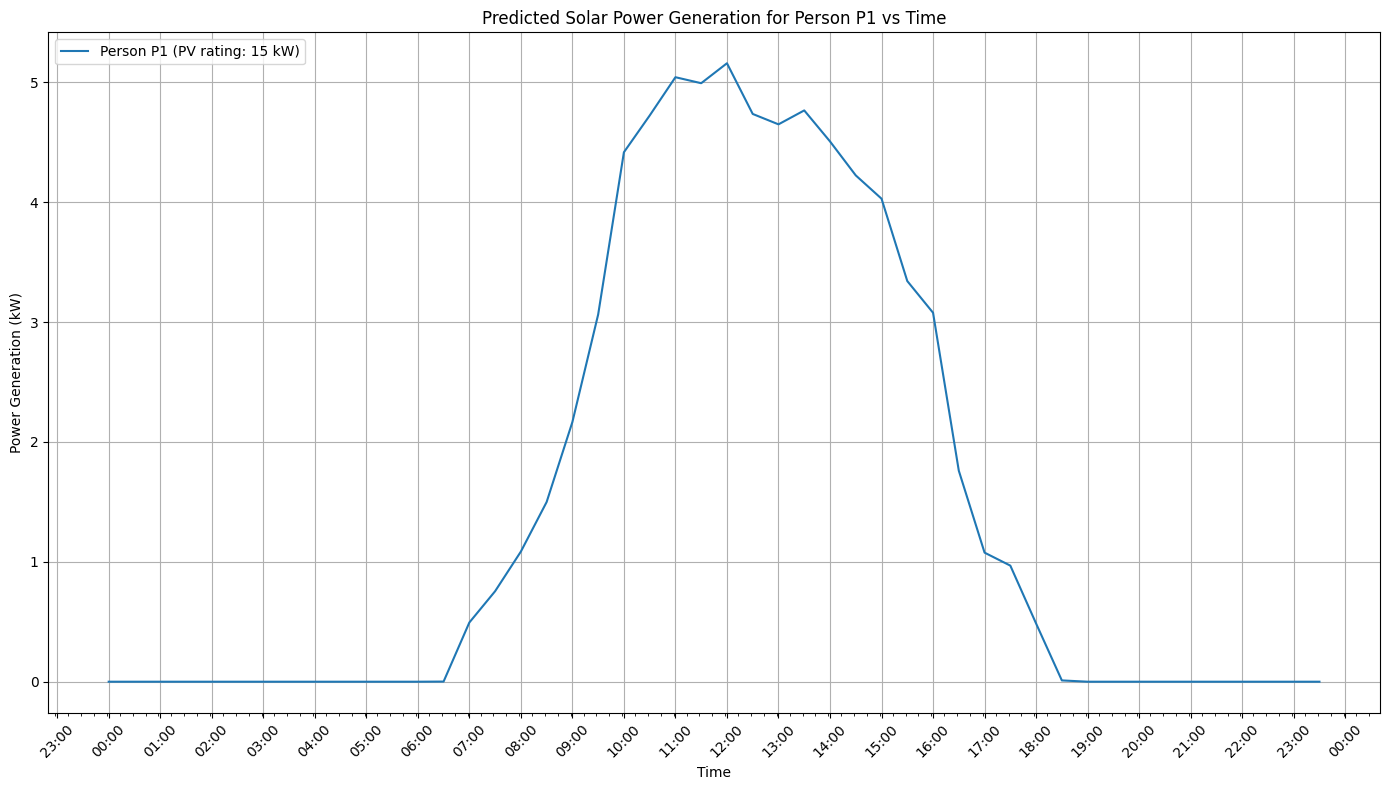

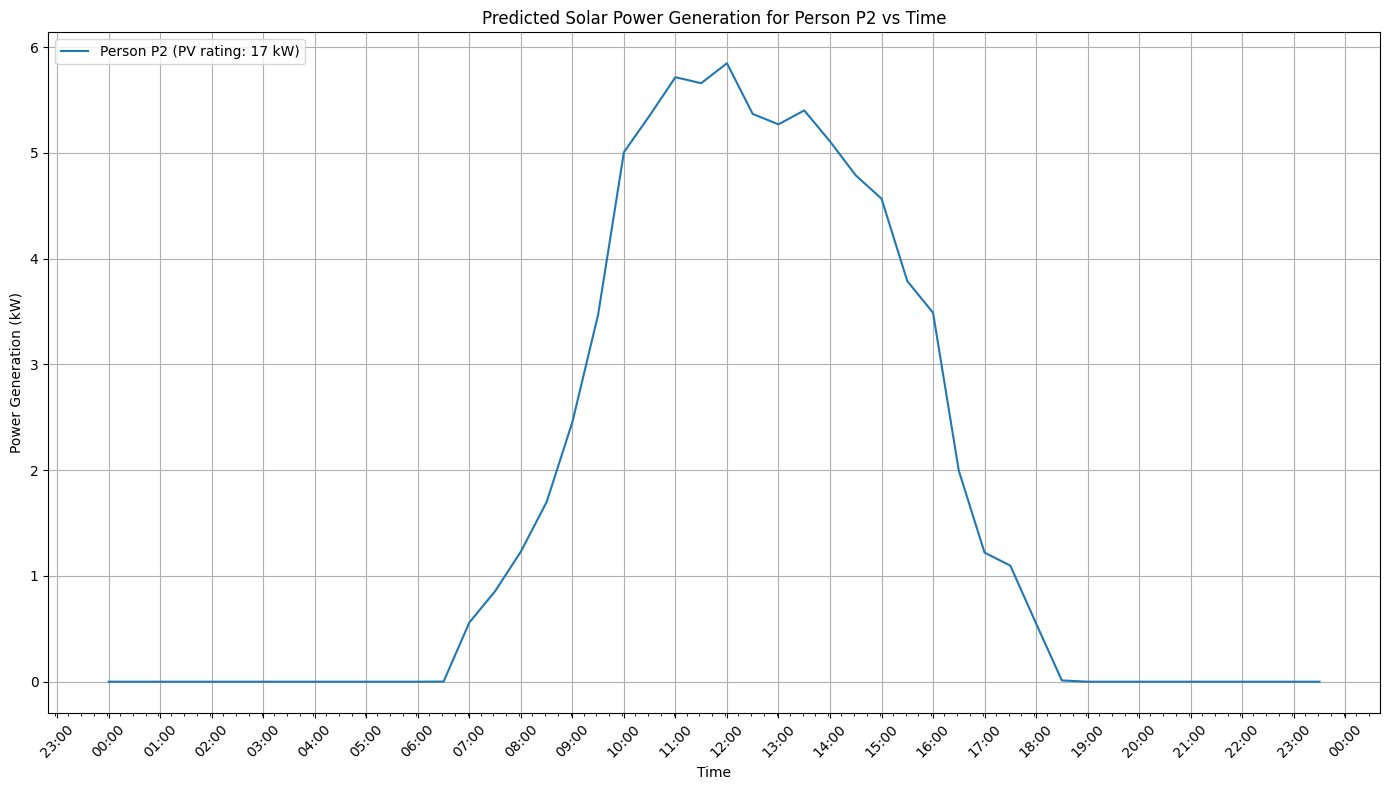

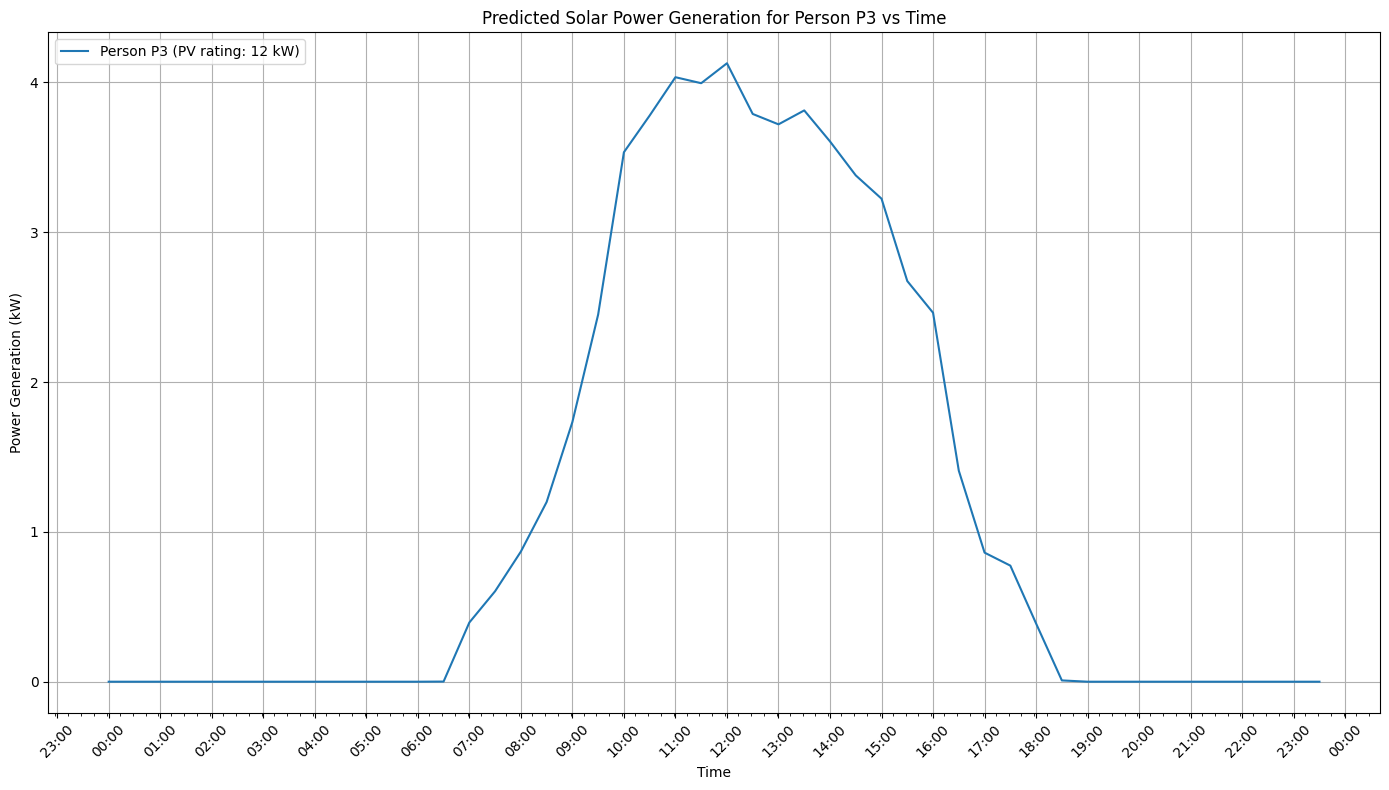

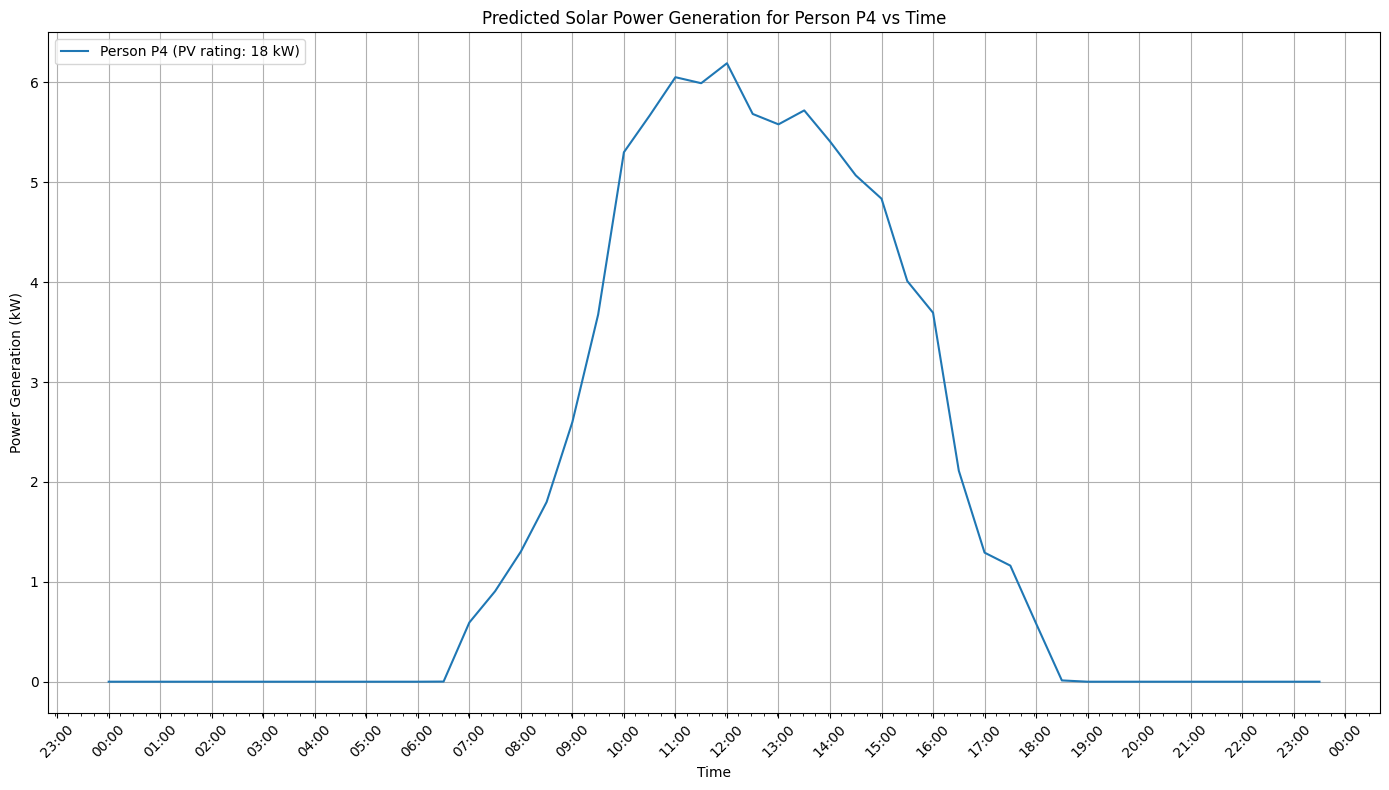

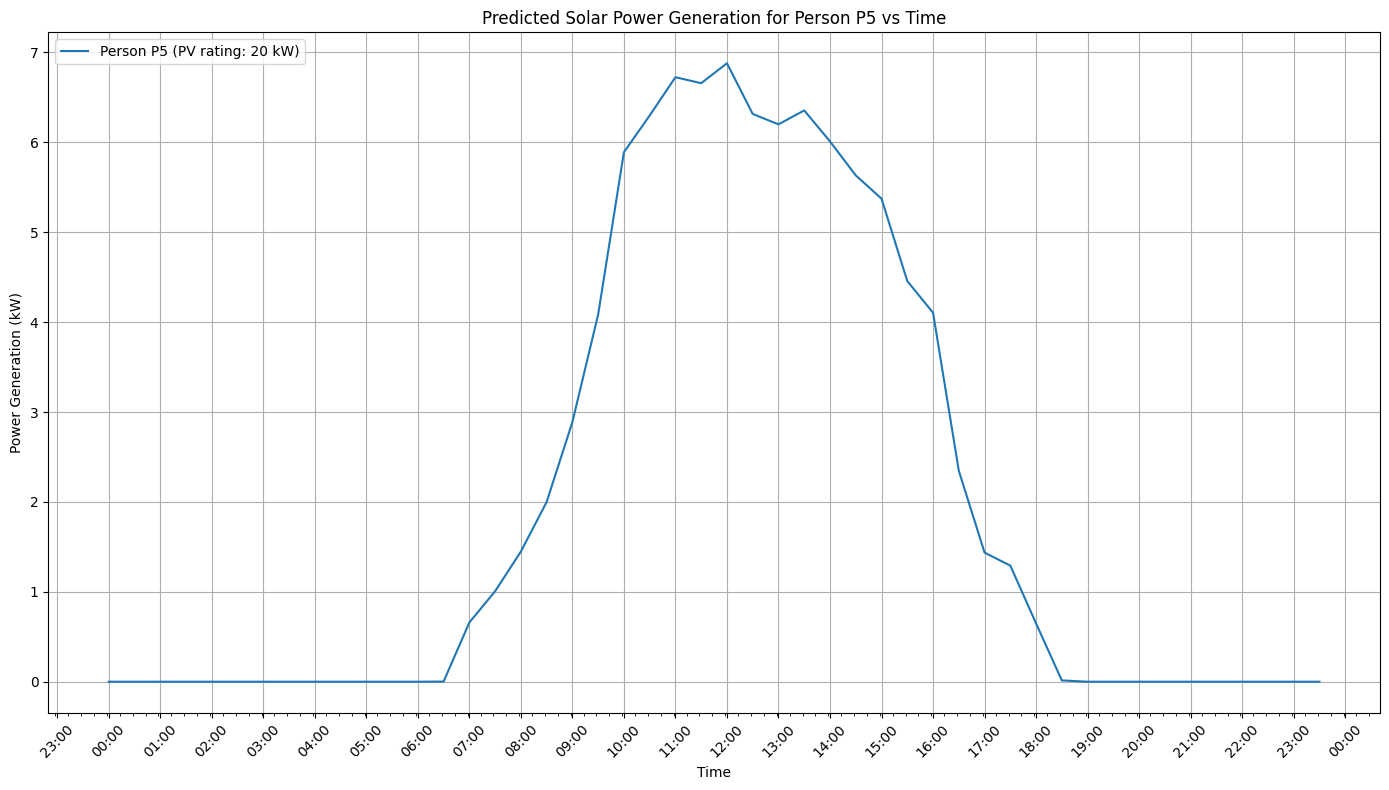

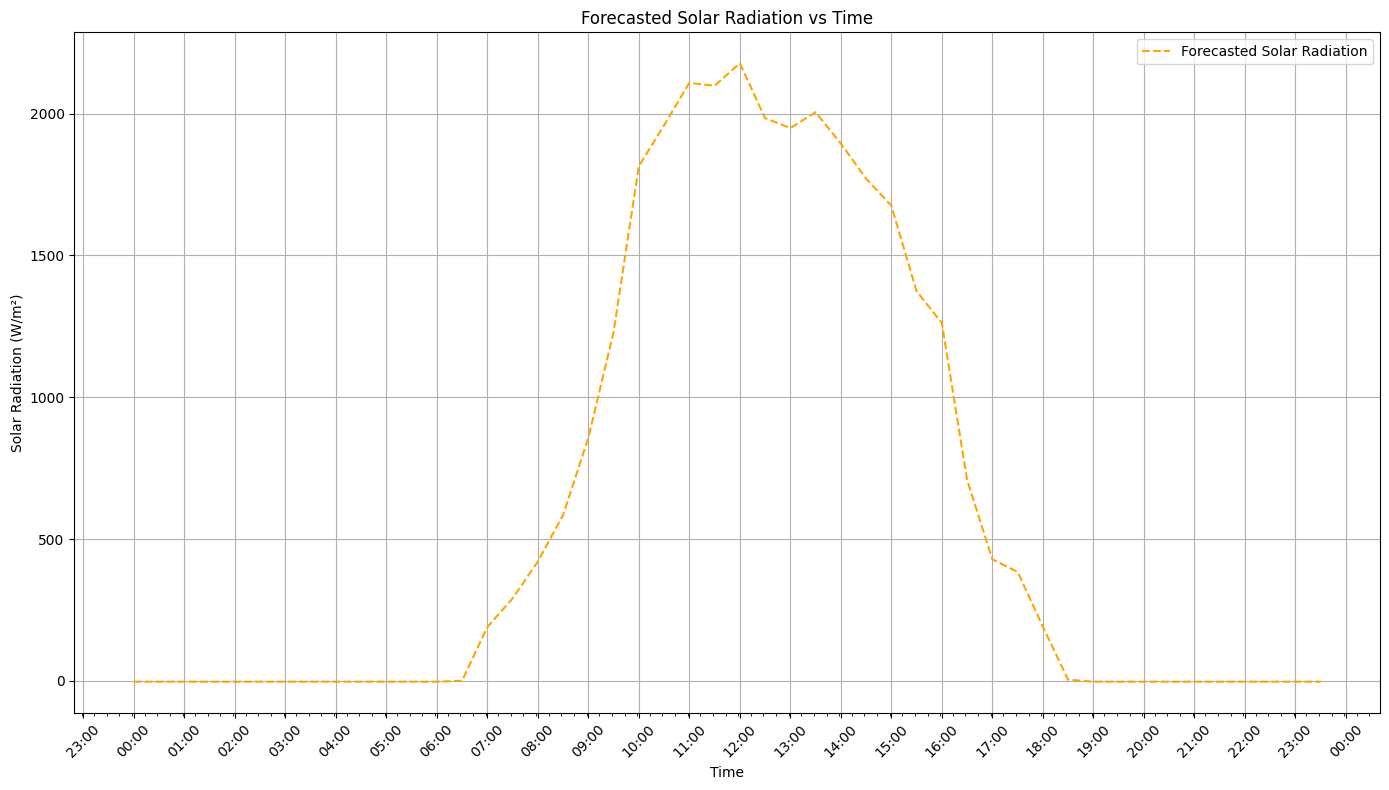

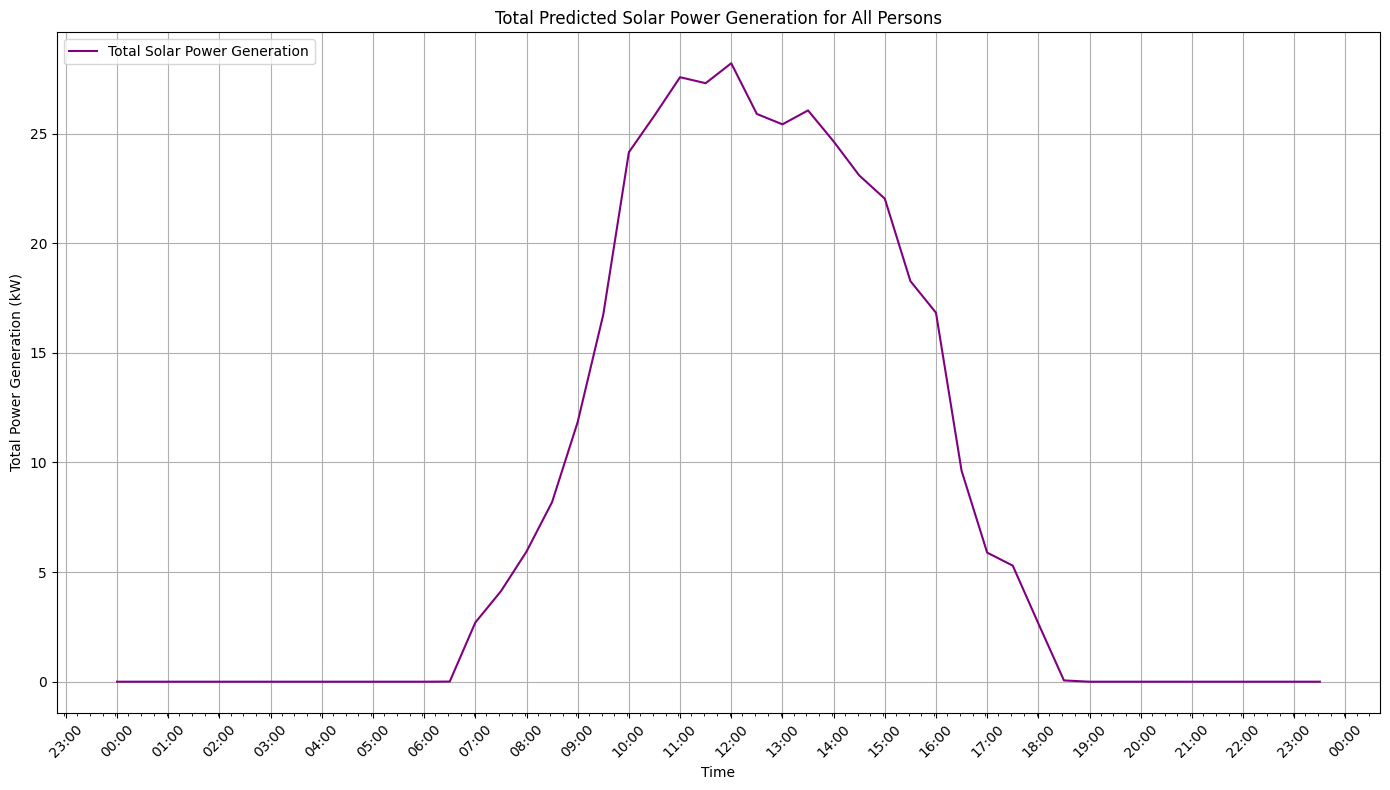

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

# PV ratings for five people
pv_ratings = np.array([15, 17, 12, 18, 20, 0, 0, 0, 0, 0])  # kW ratings for P1, P2, ..., P5
eta = 0.25  # efficiency

# Forecast data preparation
day_temp_pred = day_temp_pred.ravel()
day_rad_pred = day_rad_pred.ravel()
day_PCP1_pred = day_PCP1_pred.ravel()

# Create a DataFrame with time data
day_data = pd.DataFrame({'Date_time': pd.date_range(start=start_time, periods=len(day_rad_pred), freq='30min')})

# Initialize total solar power generation
total_solar_power_forecasted = np.zeros_like(day_rad_pred)

# Calculate solar power forecast for each person and add to total
for i, rating in enumerate(pv_ratings, start=1):
    T_C_forecasted = day_temp_pred + (NOCT - 20) * (day_rad_pred /(1000 * G_STC))
    P_PV_forecasted = (rating * eta * P_STC * F_PV * (day_rad_pred / (1000 * G_STC)) *
                       (1 + (T_C_forecasted - T_STC) * C_T))
    P_PV_forecasted[P_PV_forecasted < 0] = 0

    # Add individual solar power forecast to total
    total_solar_power_forecasted += P_PV_forecasted

    # Store individual solar power forecast in dataframe
    day_data[f'P_PV_forecasted_P{i}'] = P_PV_forecasted

# Plot each person's solar power generation in separate plots
for i in range(1, 6):
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.plot(day_data['Date_time'], day_data[f'P_PV_forecasted_P{i}'], label=f'Person P{i} (PV rating: {pv_ratings[i-1]} kW)')
    ax.set_xlabel('Time')
    ax.set_ylabel('Power Generation (kW)')
    ax.set_title(f'Predicted Solar Power Generation for Person P{i} vs Time')
    ax.legend(loc='upper left')
    ax.xaxis.set_major_locator(mdates.HourLocator())
    ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.tick_params(axis='x', rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

# Plotting solar radiation
fig2, ax2 = plt.subplots(figsize=(14, 8))
ax2.plot(day_data['Date_time'], day_rad_pred, color='orange', label='Forecasted Solar Radiation', linestyle='--')
ax2.set_xlabel('Time')
ax2.set_ylabel('Solar Radiation (W/m²)')
ax2.set_title('Forecasted Solar Radiation vs Time')
ax2.xaxis.set_major_locator(mdates.HourLocator())
ax2.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax2.tick_params(axis='x', rotation=45)
ax2.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()

# Plotting total solar power generation
fig3, ax3 = plt.subplots(figsize=(14, 8))
ax3.plot(day_data['Date_time'], total_solar_power_forecasted, color='purple', label='Total Solar Power Generation')
ax3.set_xlabel('Time')
ax3.set_ylabel('Total Power Generation (kW)')
ax3.set_title('Total Predicted Solar Power Generation for All Persons')
ax3.xaxis.set_major_locator(mdates.HourLocator())
ax3.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax3.tick_params(axis='x', rotation=45)
ax3.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


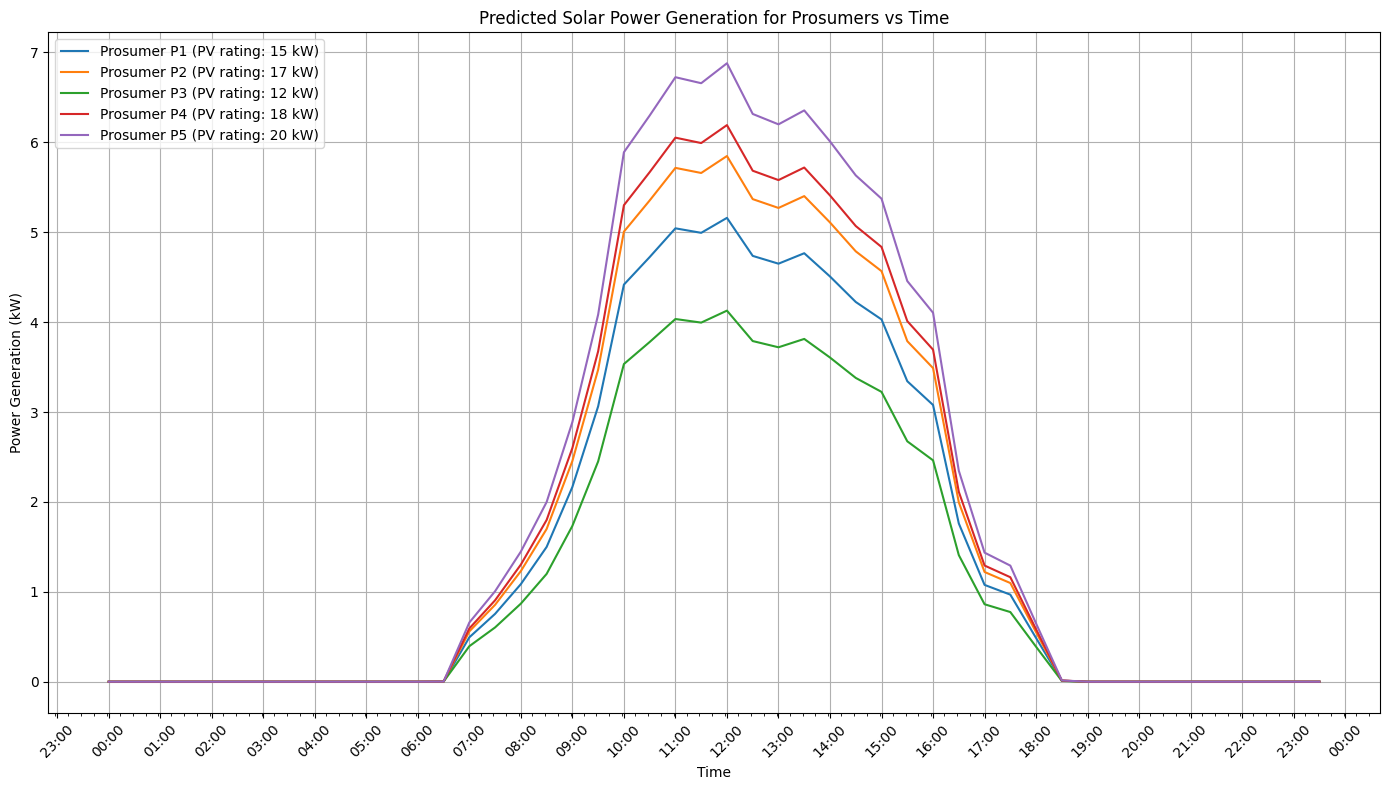

In [ ]:
# Plot solar power generation for the first five individuals in a single plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot each individual's solar power generation
for i in range(1, 6):
    ax.plot(day_data['Date_time'], day_data[f'P_PV_forecasted_P{i}'], label=f'Prosumer P{i} (PV rating: {pv_ratings[i-1]} kW)')

# Set plot labels, title, and legend
ax.set_xlabel('Time')
ax.set_ylabel('Power Generation (kW)')
ax.set_title('Predicted Solar Power Generation for Prosumers vs Time')
ax.legend(loc='upper left')
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.tick_params(axis='x', rotation=45)

# Add grid and finalize layout
plt.grid()
plt.tight_layout()
plt.show()


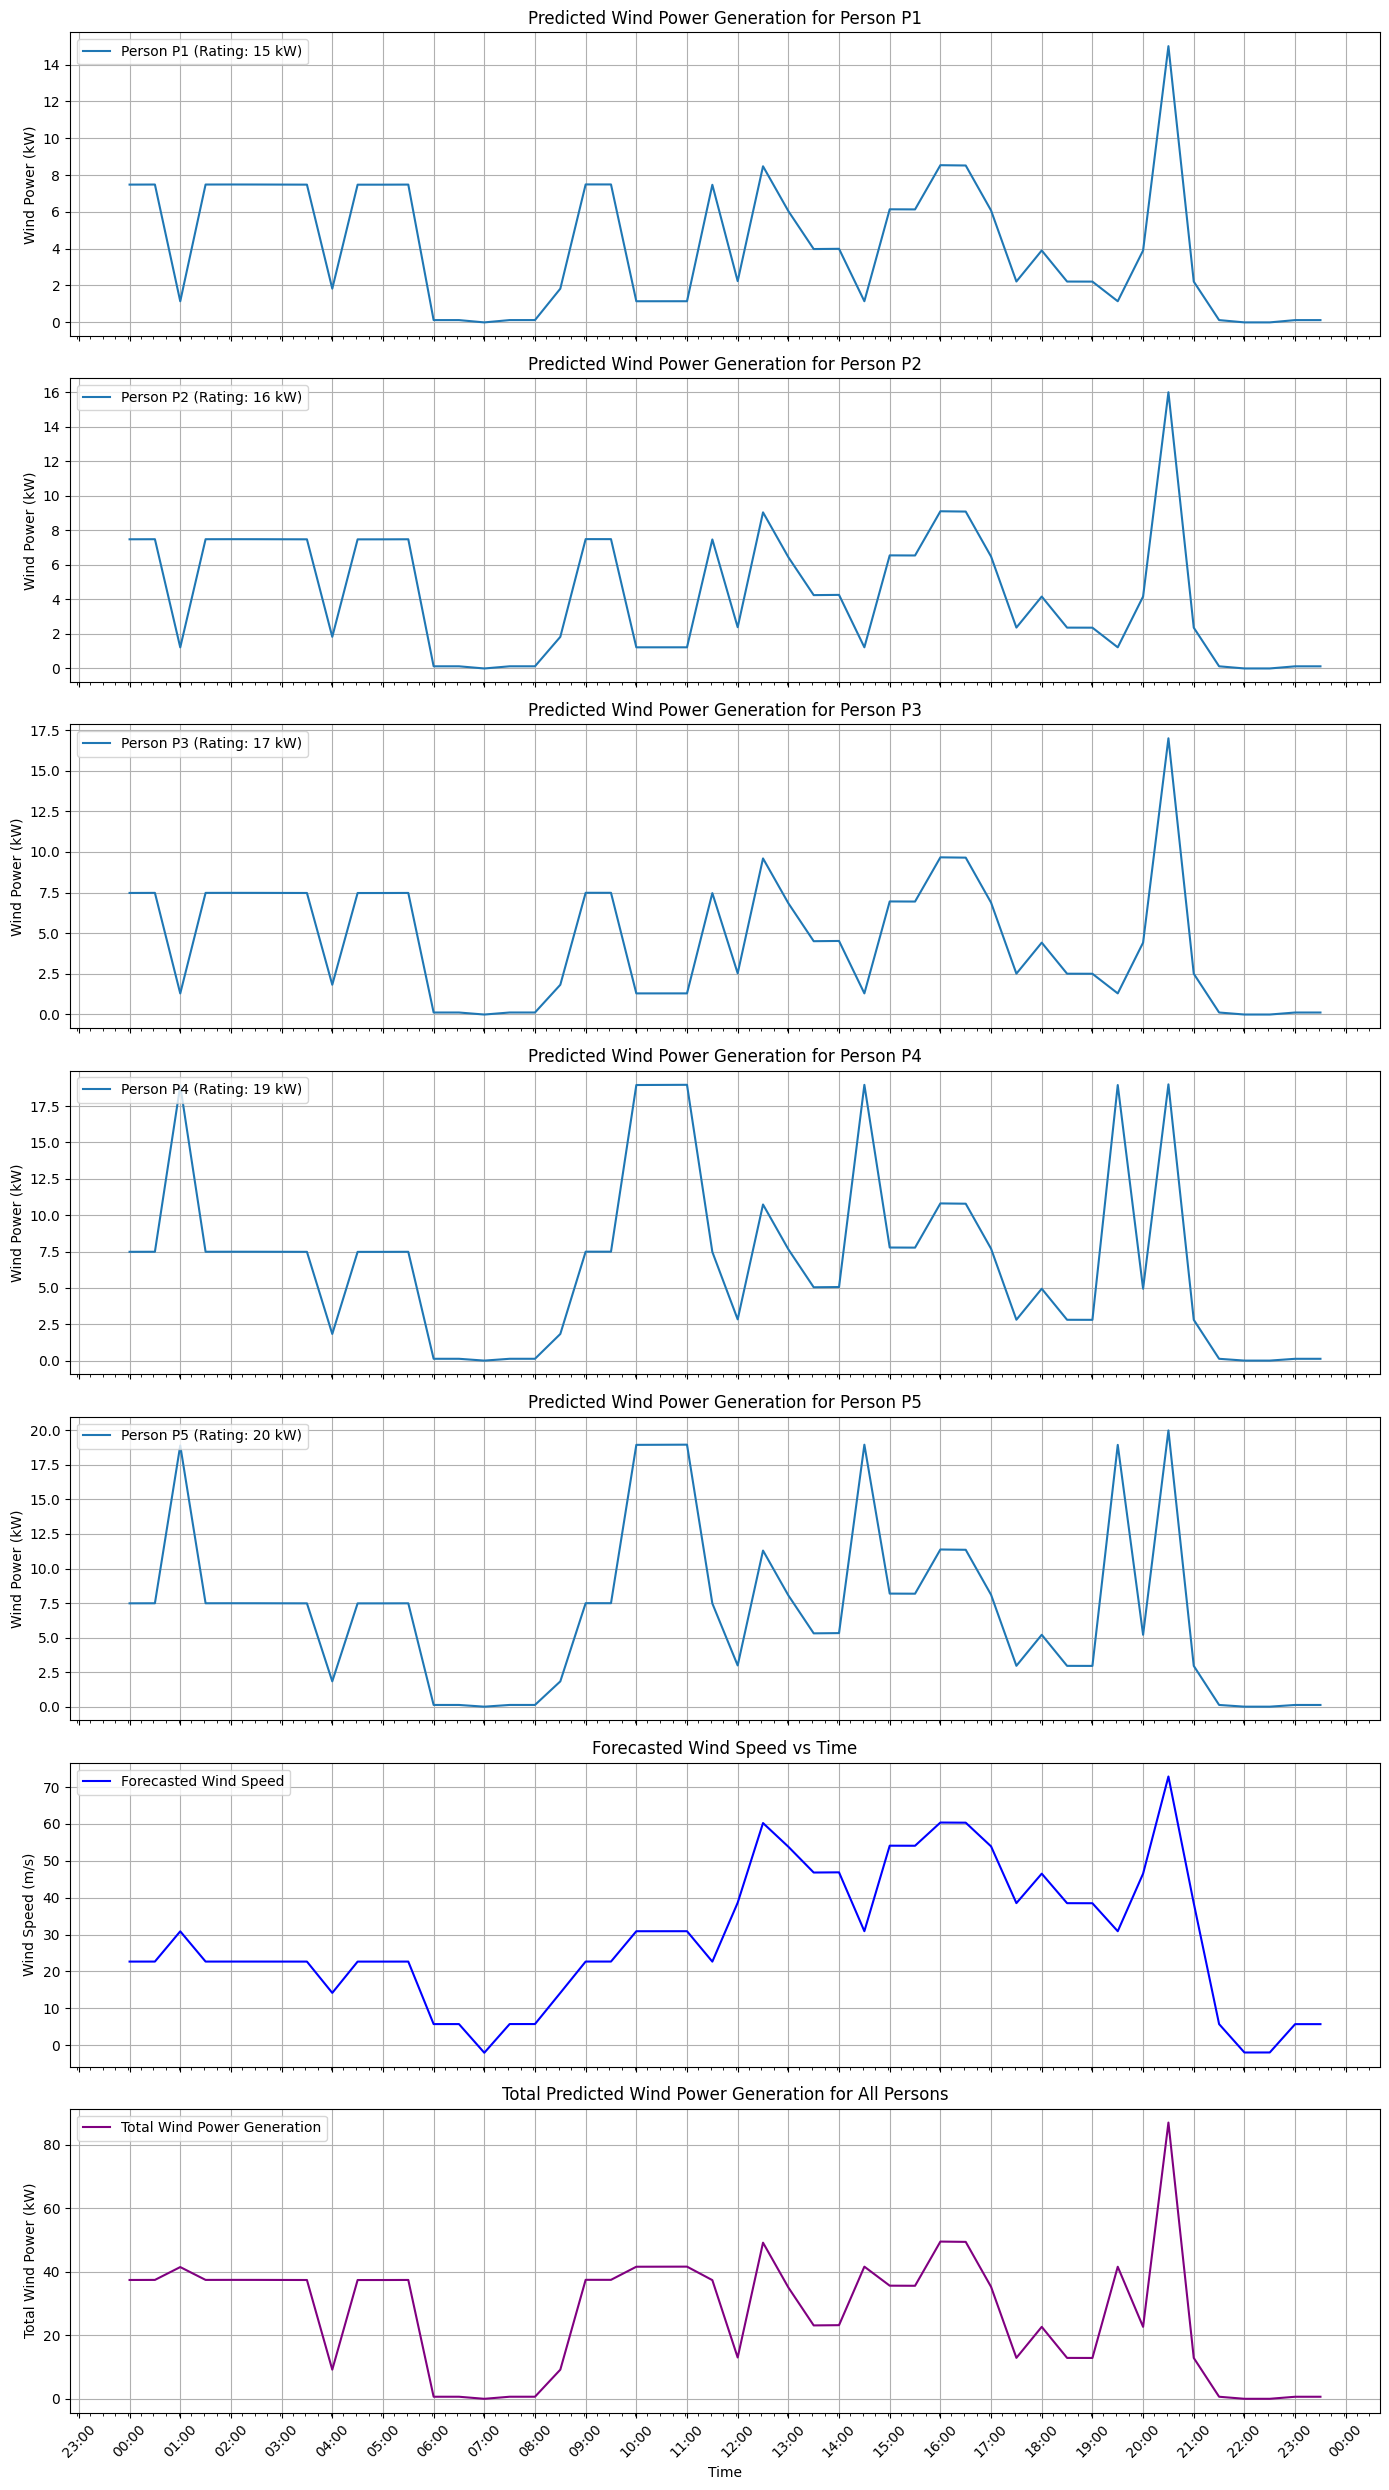

In [ ]:
# Define wind turbine ratings for each person in kW
wind_ratings = np.array([15, 16, 17, 19, 20, 0, 0, 0, 0, 0])  # Ratings for P1, P2, ..., P5
rho = 1.225  # Air density in kg/m³
A = 3        # Swept area in m² (example value)
eta = 0.35   # Efficiency of the turbine

# Ensure wind predictions are in 1D
day_wind_pred = day_wind_pred.ravel()

# Initialize total wind power generation
total_wind_power_forecasted = np.zeros_like(day_wind_pred)

# Calculate wind power for each person and add it to the total
for i, rating in enumerate(wind_ratings, start=1):
    # Calculate power based on wind speed, area, and efficiency
    wind_power_forecasted = 0.5 * rho * A * eta * (day_wind_pred ** 3) / 1000  # Power in kW

    # Cap generated power to the turbine rating for each person after efficiency is applied
    wind_power_forecasted = np.where(wind_power_forecasted > rating, rating * (wind_power_forecasted / np.max(wind_power_forecasted)), wind_power_forecasted)

    # Add individual wind power forecast to total
    total_wind_power_forecasted += wind_power_forecasted

    # Store individual wind power forecast in dataframe
    day_data[f'Wind_forecasted_P{i}'] = wind_power_forecasted

# Plotting wind power generation for each person and total wind power generation
fig, axs = plt.subplots(7, 1, figsize=(14, 25), sharex=True)

# Plot wind power generation for each person in separate subplots
for i in range(1, 6):
    axs[i - 1].plot(day_data['Date_time'], day_data[f'Wind_forecasted_P{i}'], label=f'Person P{i} (Rating: {wind_ratings[i-1]} kW)')
    axs[i - 1].set_ylabel('Wind Power (kW)')
    axs[i - 1].set_title(f'Predicted Wind Power Generation for Person P{i}')
    axs[i - 1].legend(loc='upper left')
    axs[i - 1].grid()

# Plot forecasted wind speed in separate subplot
axs[5].plot(day_data['Date_time'], day_wind_pred, color='blue', label='Forecasted Wind Speed')
axs[5].set_ylabel('Wind Speed (m/s)')
axs[5].set_title('Forecasted Wind Speed vs Time')
axs[5].legend()
axs[5].grid()

# Plot total wind power generation in the last subplot
axs[6].plot(day_data['Date_time'], total_wind_power_forecasted, color='purple', label='Total Wind Power Generation')
axs[6].set_xlabel('Time')
axs[6].set_ylabel('Total Wind Power (kW)')
axs[6].set_title('Total Predicted Wind Power Generation for All Persons')
axs[6].legend()
axs[6].grid()

# Formatting the x-axis to show time every hour with 15-minute minor ticks
for ax in axs:
    ax.xaxis.set_major_locator(mdates.HourLocator())
    ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


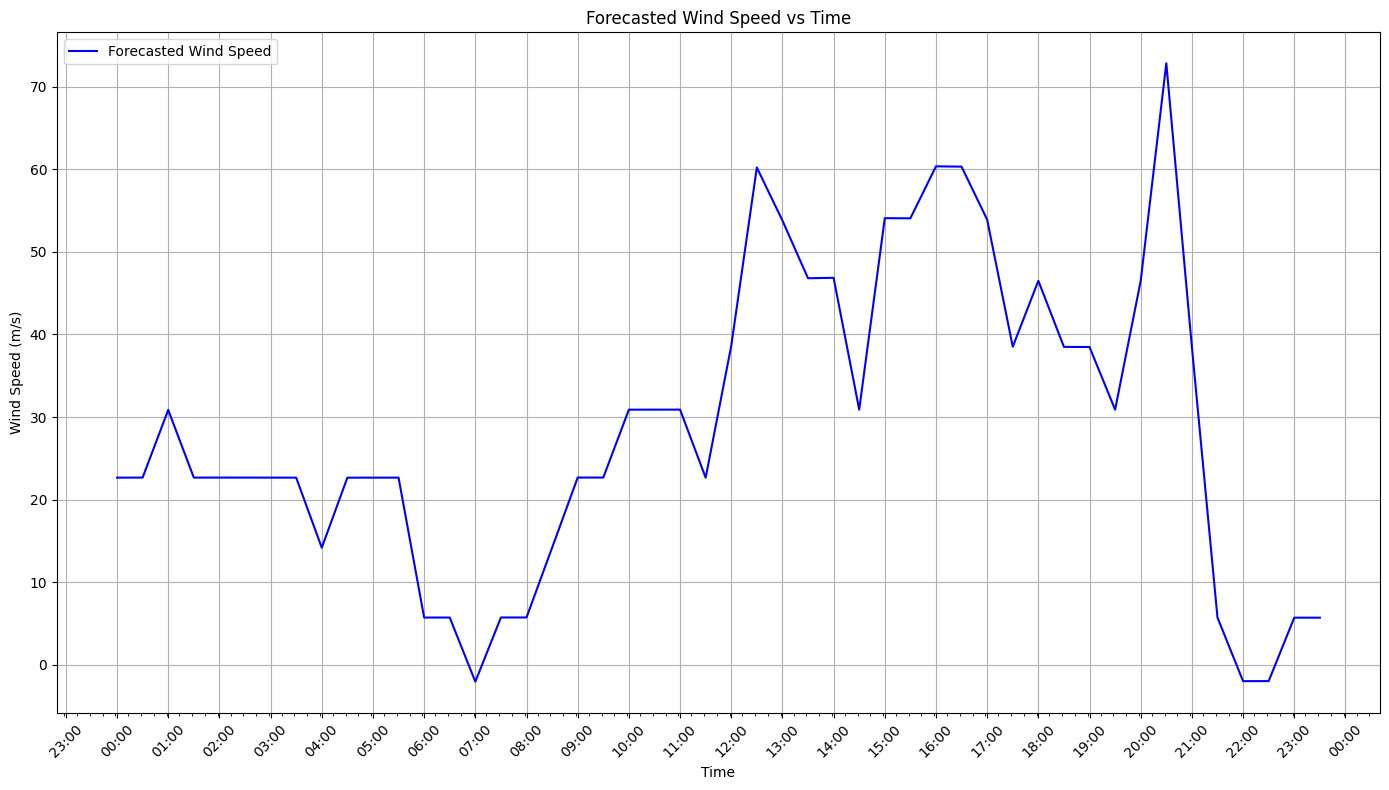

In [ ]:
# Plot forecasted wind speed vs time
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(day_data['Date_time'], day_wind_pred, color='blue', label='Forecasted Wind Speed')
ax.set_xlabel('Time')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_title('Forecasted Wind Speed vs Time')
ax.legend(loc='upper left')
ax.grid()

# Format the x-axis to show time every hour with 15-minute minor ticks
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


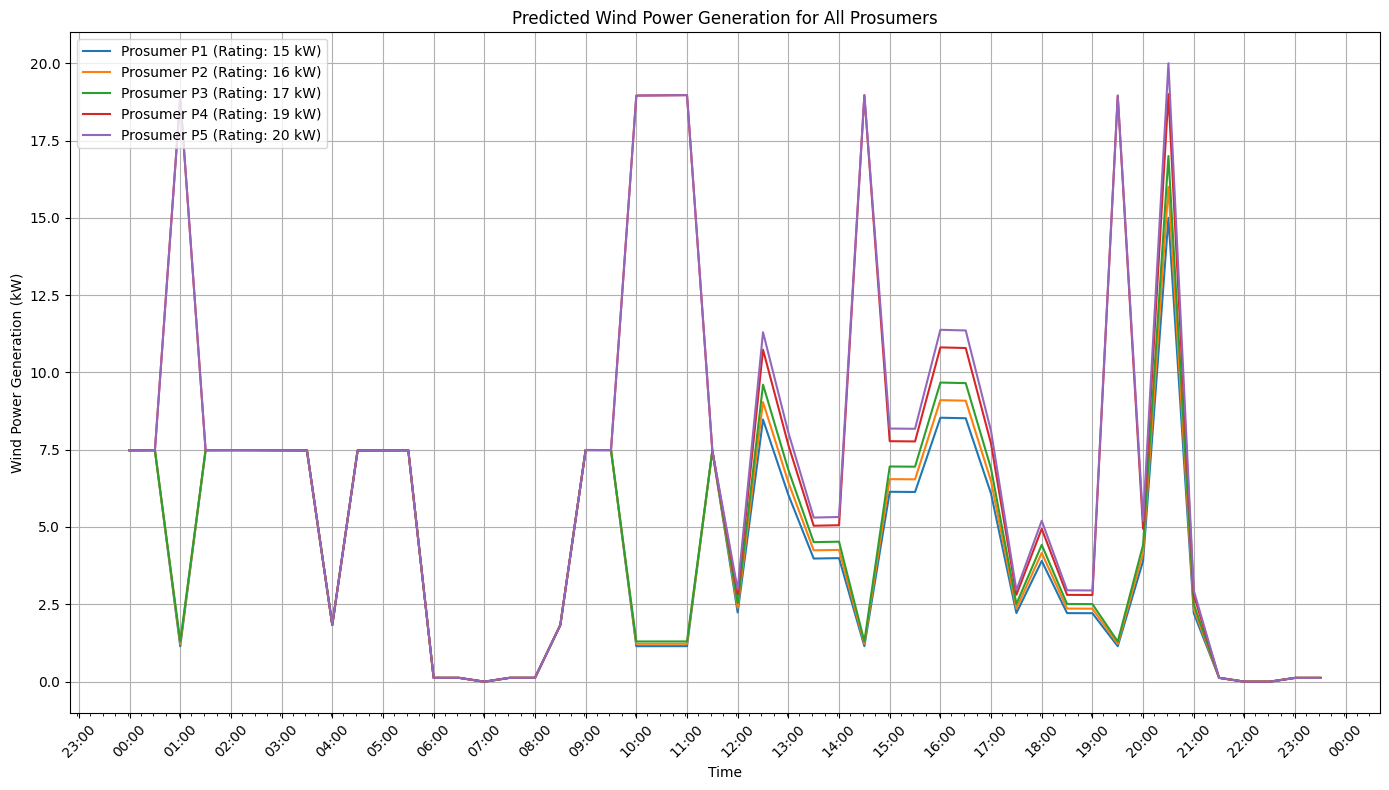

In [ ]:
# Plot wind power generation for all individuals on a single plot
fig, ax = plt.subplots(figsize=(14, 8))

for i in range(1, 6):
    ax.plot(day_data['Date_time'], day_data[f'Wind_forecasted_P{i}'], label=f'Prosumer P{i} (Rating: {wind_ratings[i-1]} kW)')

ax.set_xlabel('Time')
ax.set_ylabel('Wind Power Generation (kW)')
ax.set_title('Predicted Wind Power Generation for All Prosumers')
ax.legend(loc='upper left')
ax.grid()

# Format the x-axis to show time every hour with 15-minute minor ticks
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


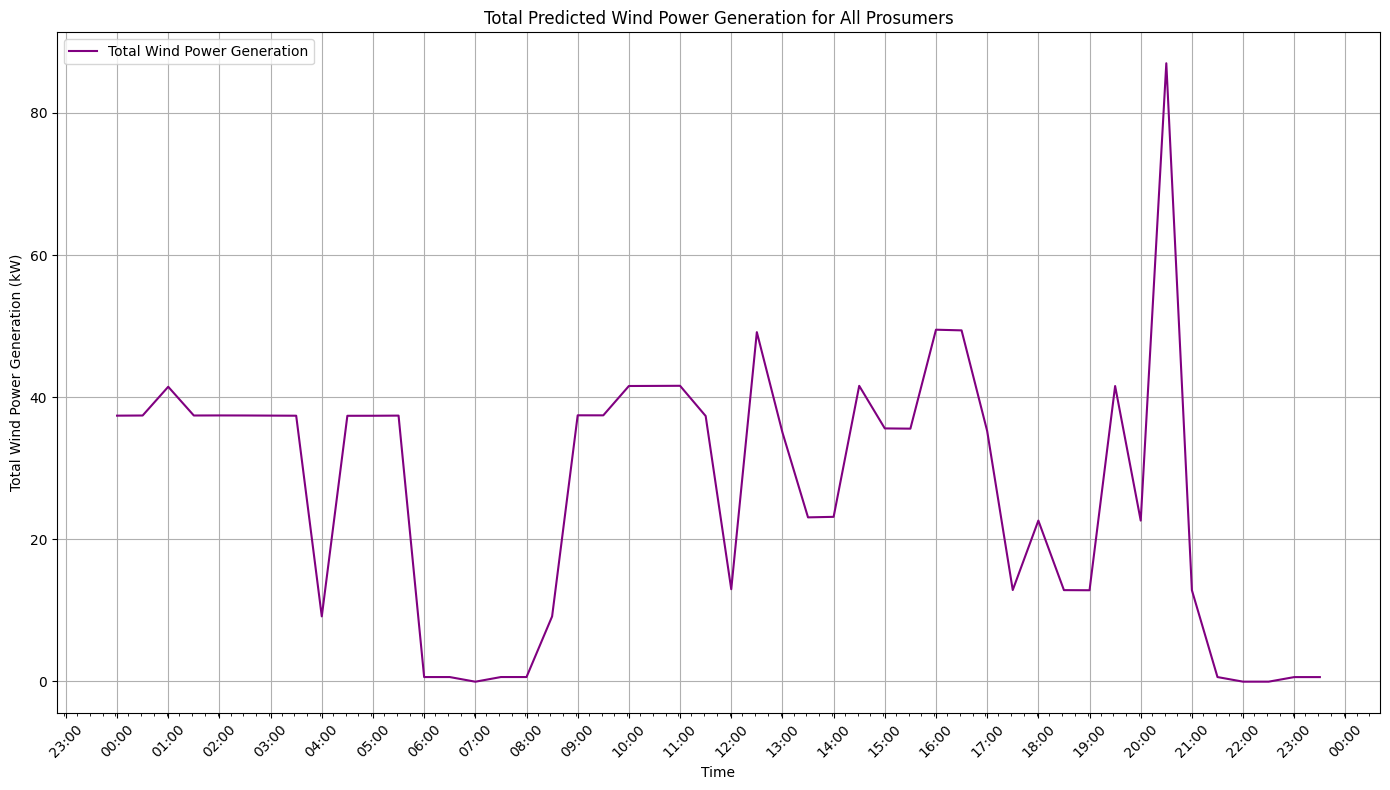

In [ ]:
# Plot total wind power generation
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(day_data['Date_time'], total_wind_power_forecasted, color='purple', label='Total Wind Power Generation')

ax.set_xlabel('Time')
ax.set_ylabel('Total Wind Power Generation (kW)')
ax.set_title('Total Predicted Wind Power Generation for All Prosumers')
ax.legend(loc='upper left')
ax.grid()

# Format the x-axis to show time every hour with 15-minute minor ticks
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


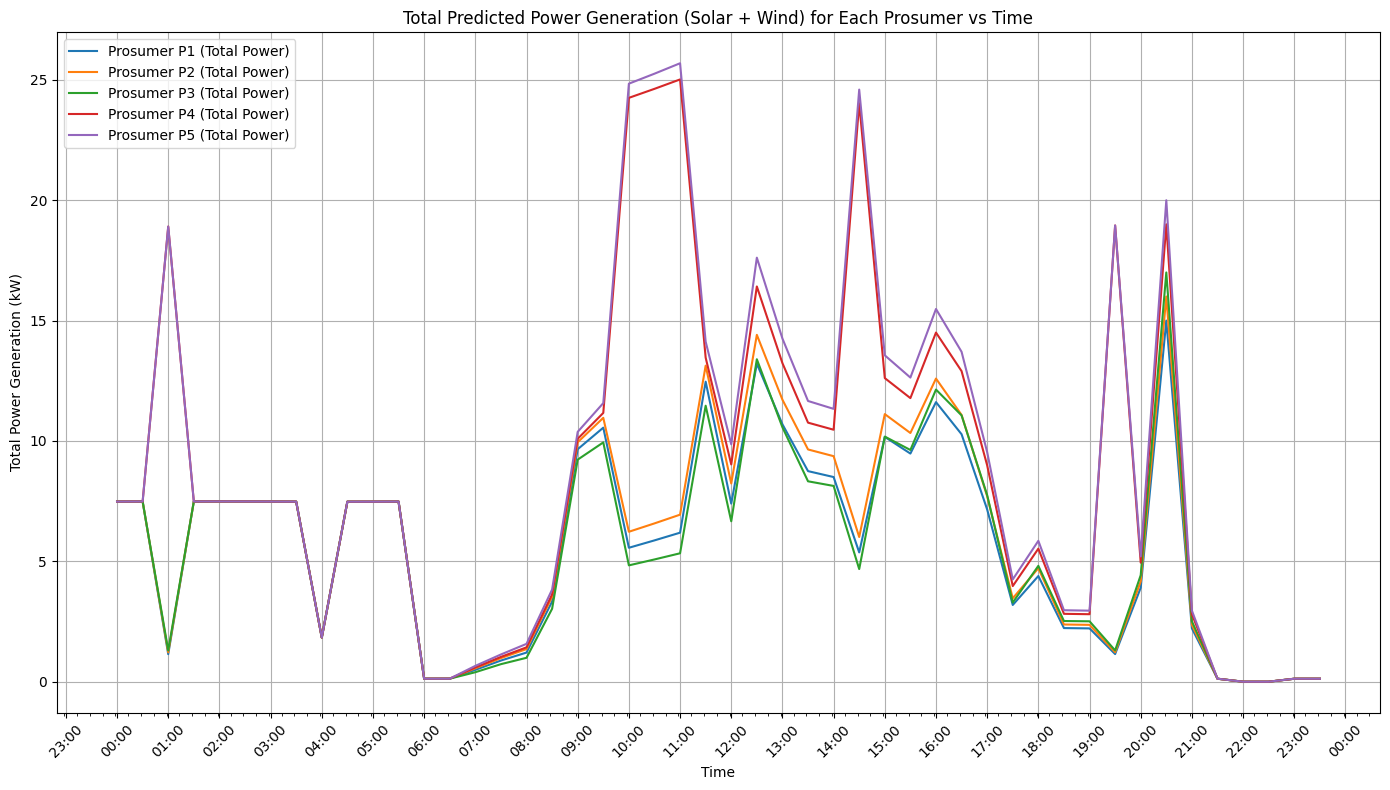

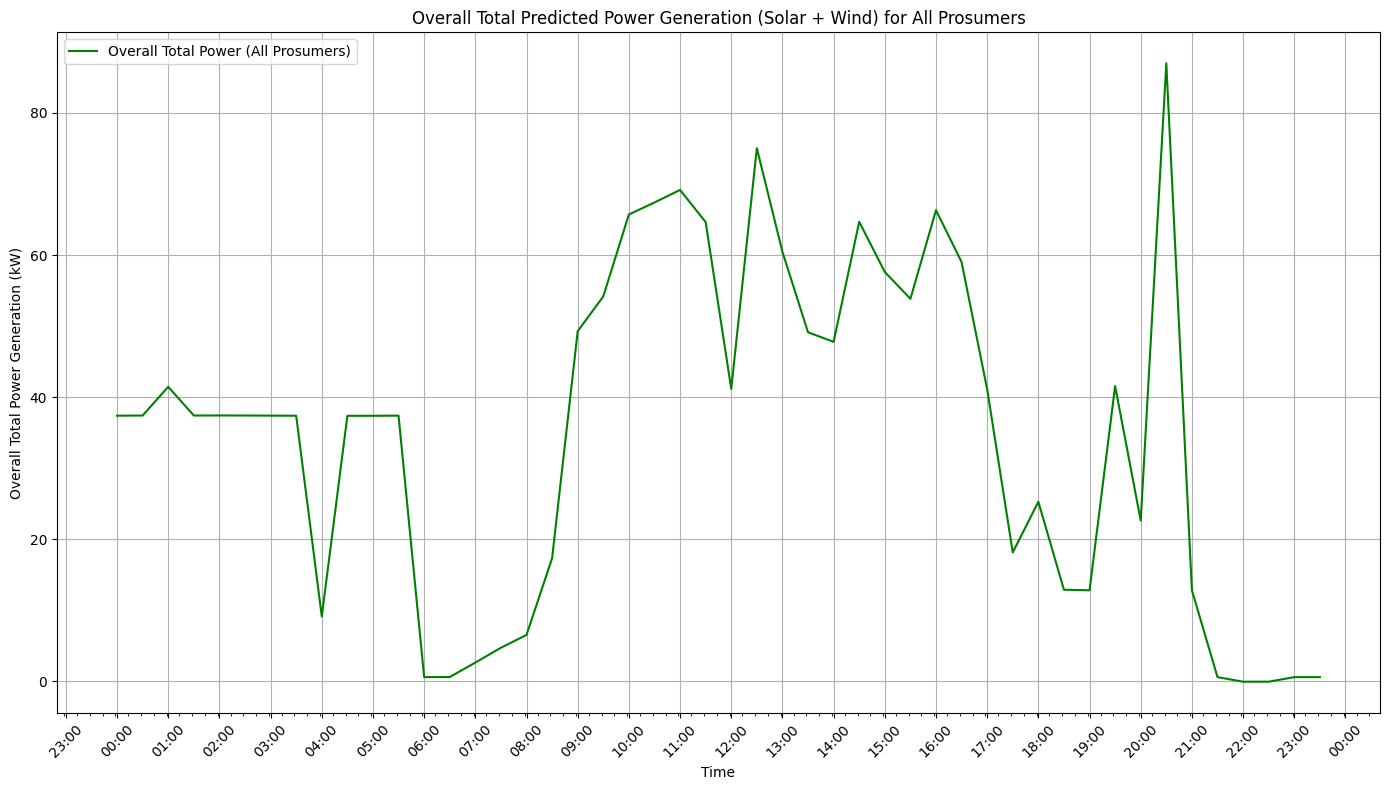

In [ ]:
# Adding total power calculation by combining solar and wind power for each person
for i in range(1, 11):
    day_data[f'Total_Power_P{i}'] = day_data[f'P_PV_forecasted_P{i}'] + day_data[f'Wind_forecasted_P{i}']

# Calculate overall total power by summing the total power of each person
day_data['Overall_Total_Power'] = sum(day_data[f'Total_Power_P{i}'] for i in range(1, 11))

# Plotting total power generation for each person
fig1, ax1 = plt.subplots(figsize=(14, 8))
for i in range(1, 6):
    ax1.plot(day_data['Date_time'], day_data[f'Total_Power_P{i}'], label=f'Prosumer P{i} (Total Power)')

# Customize individual total power plot
ax1.set_xlabel('Time')
ax1.set_ylabel('Total Power Generation (kW)')
ax1.set_title('Total Predicted Power Generation (Solar + Wind) for Each Prosumer vs Time')
ax1.legend(loc='upper left')
ax1.xaxis.set_major_locator(mdates.HourLocator())
ax1.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax1.tick_params(axis='x', rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Plotting overall total power generation for all persons combined
fig2, ax2 = plt.subplots(figsize=(14, 8))
ax2.plot(day_data['Date_time'], day_data['Overall_Total_Power'], color='green', label='Overall Total Power (All Prosumers)')

# Customize overall total power plot
ax2.set_xlabel('Time')
ax2.set_ylabel('Overall Total Power Generation (kW)')
ax2.set_title('Overall Total Predicted Power Generation (Solar + Wind) for All Prosumers')
ax2.legend(loc='upper left')
ax2.xaxis.set_major_locator(mdates.HourLocator())
ax2.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax2.tick_params(axis='x', rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


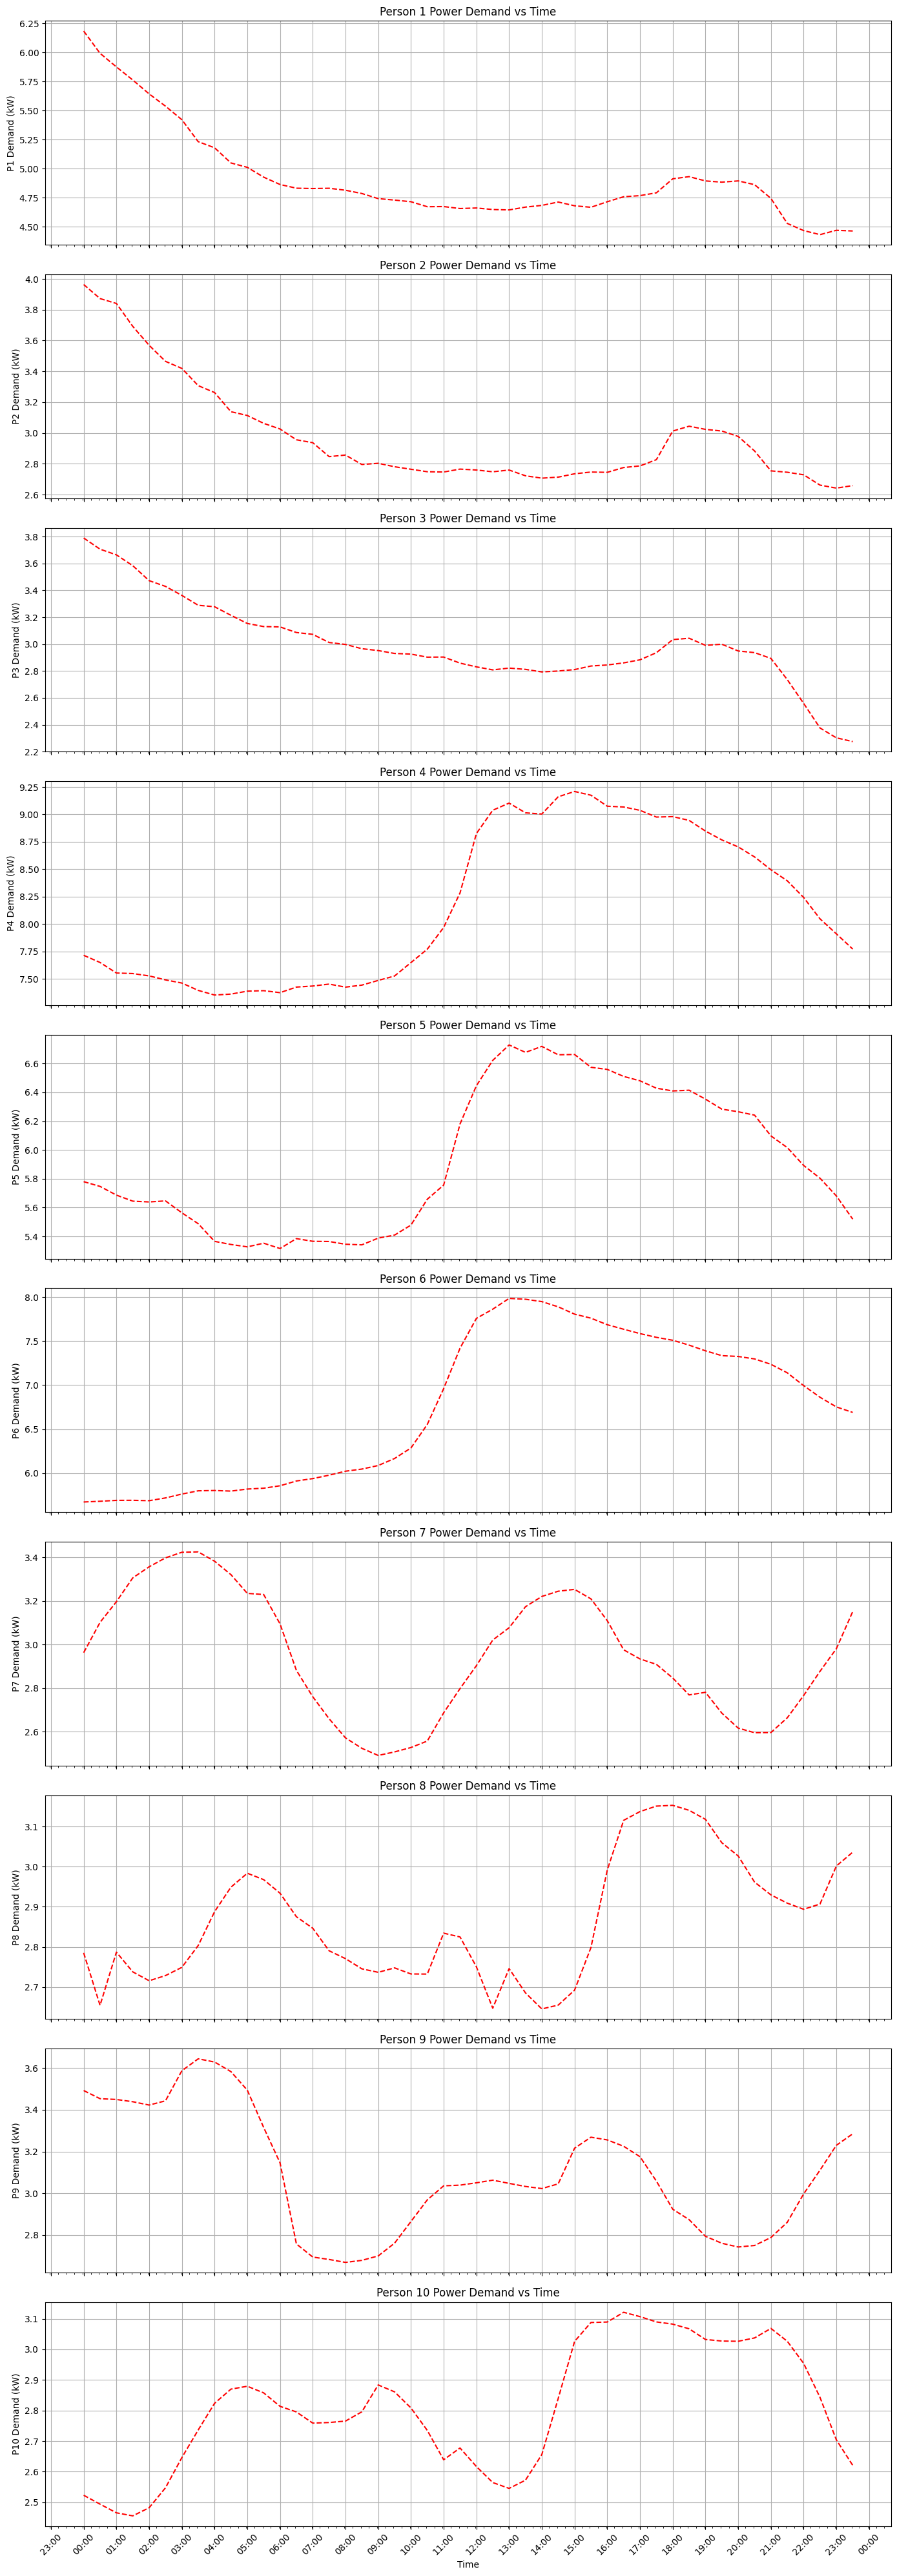

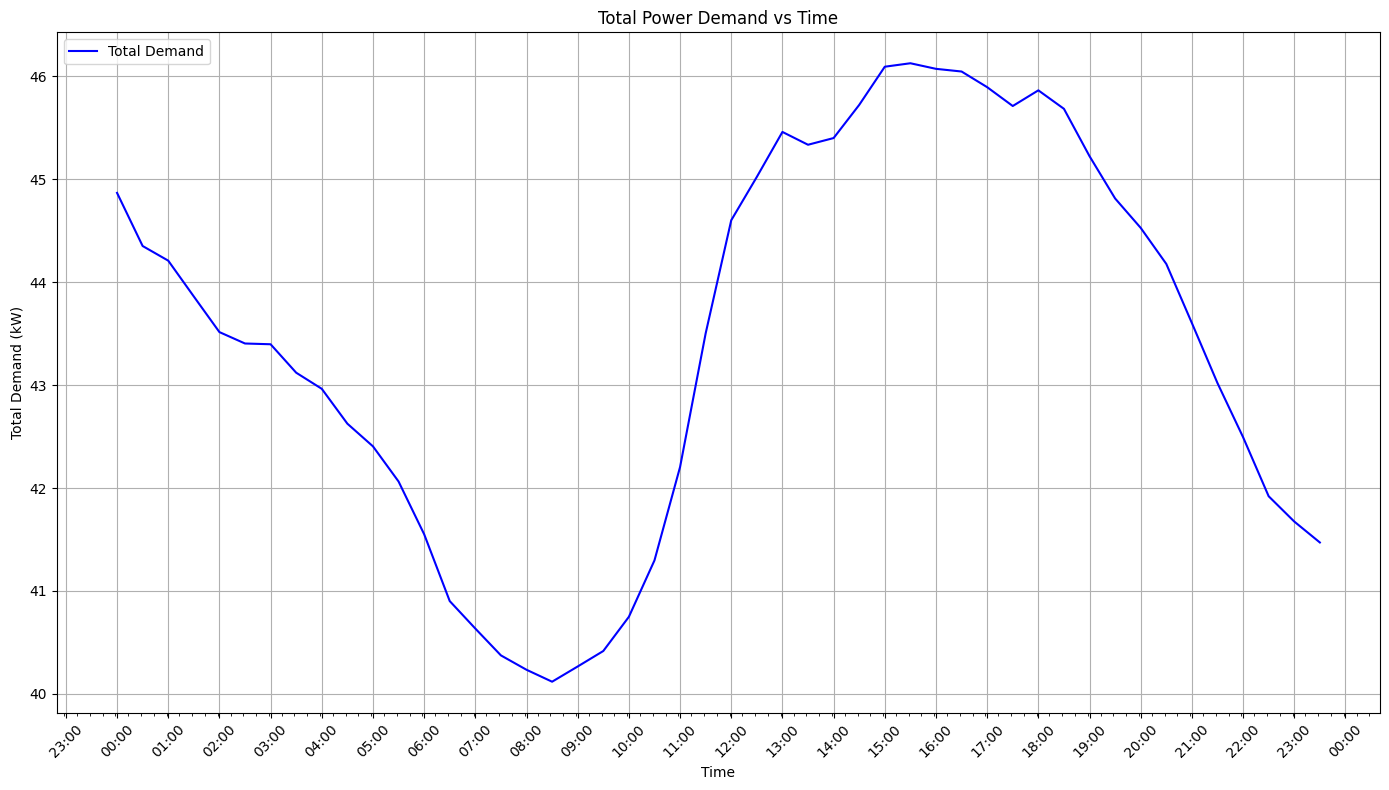

In [ ]:
#Create a 10-row figure with individual subplots for each person's power demand
fig, axs = plt.subplots(10, 1, figsize=(14, 40), sharex=True)
factor = 25

# Loop through each person (1 to 10) and plot their power demand in a separate subplot
for i in range(1, 11):
    ax = axs[i - 1]
    ax.plot(day_data['Date_time'], globals()[f'day_PCP{i}_pred'] / factor, color='red', linestyle='--')
    ax.set_ylabel(f'P{i} Demand (kW)')
    ax.set_title(f'Person {i} Power Demand vs Time')
    ax.xaxis.set_major_locator(mdates.HourLocator())
    ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.tick_params(axis='x', rotation=45)

# Label the shared x-axis and add grid lines
axs[-1].set_xlabel('Time')
for ax in axs:
    ax.grid()

plt.tight_layout()
plt.show()


# Calculate total demand by summing the demand of each person
day_data['Total_Demand'] = sum([globals()[f'day_PCP{i}_pred'].ravel()/factor for i in range(1, 11)])

# Plotting total demand
fig2, ax2 = plt.subplots(figsize=(14, 8))
ax2.plot(day_data['Date_time'], day_data['Total_Demand'], color='blue', label='Total Demand')
ax2.set_xlabel('Time')
ax2.set_ylabel('Total Demand (kW)')
ax2.set_title('Total Power Demand vs Time')
ax2.legend(loc='upper left')
ax2.xaxis.set_major_locator(mdates.HourLocator())
ax2.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax2.tick_params(axis='x', rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Plotting net power demand (Demand - Total Power Generation) for each person
# fig3, ax3 = plt.subplots(figsize=(14, 8))
# for i in range(1, 6):
#     # Net power is demand minus the combined solar and wind power generation
#     net_power = day_data[f'Total_Power_P{i}'] - globals()[f'day_PCP{i}_pred'].ravel() / 5
#     ax3.plot(day_data['Date_time'], net_power, label=f'Person P{i} (Net Power)')
# ax3.set_xlabel('Time')
# ax3.set_ylabel('Net Power for P2P (kW)')
# ax3.set_title('Total Net Power of Energy Sharing (Total Power Generation - Demand) vs Time')
# ax3.set_ylim(-500, 1500)  # Adjust y-axis limit for net power generation as needed
# ax3.legend(loc='upper left')
# ax3.xaxis.set_major_locator(mdates.HourLocator())
# ax3.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
# ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax3.tick_params(axis='x', rotation=45)
# plt.grid()
# plt.tight_layout()
# plt.show()


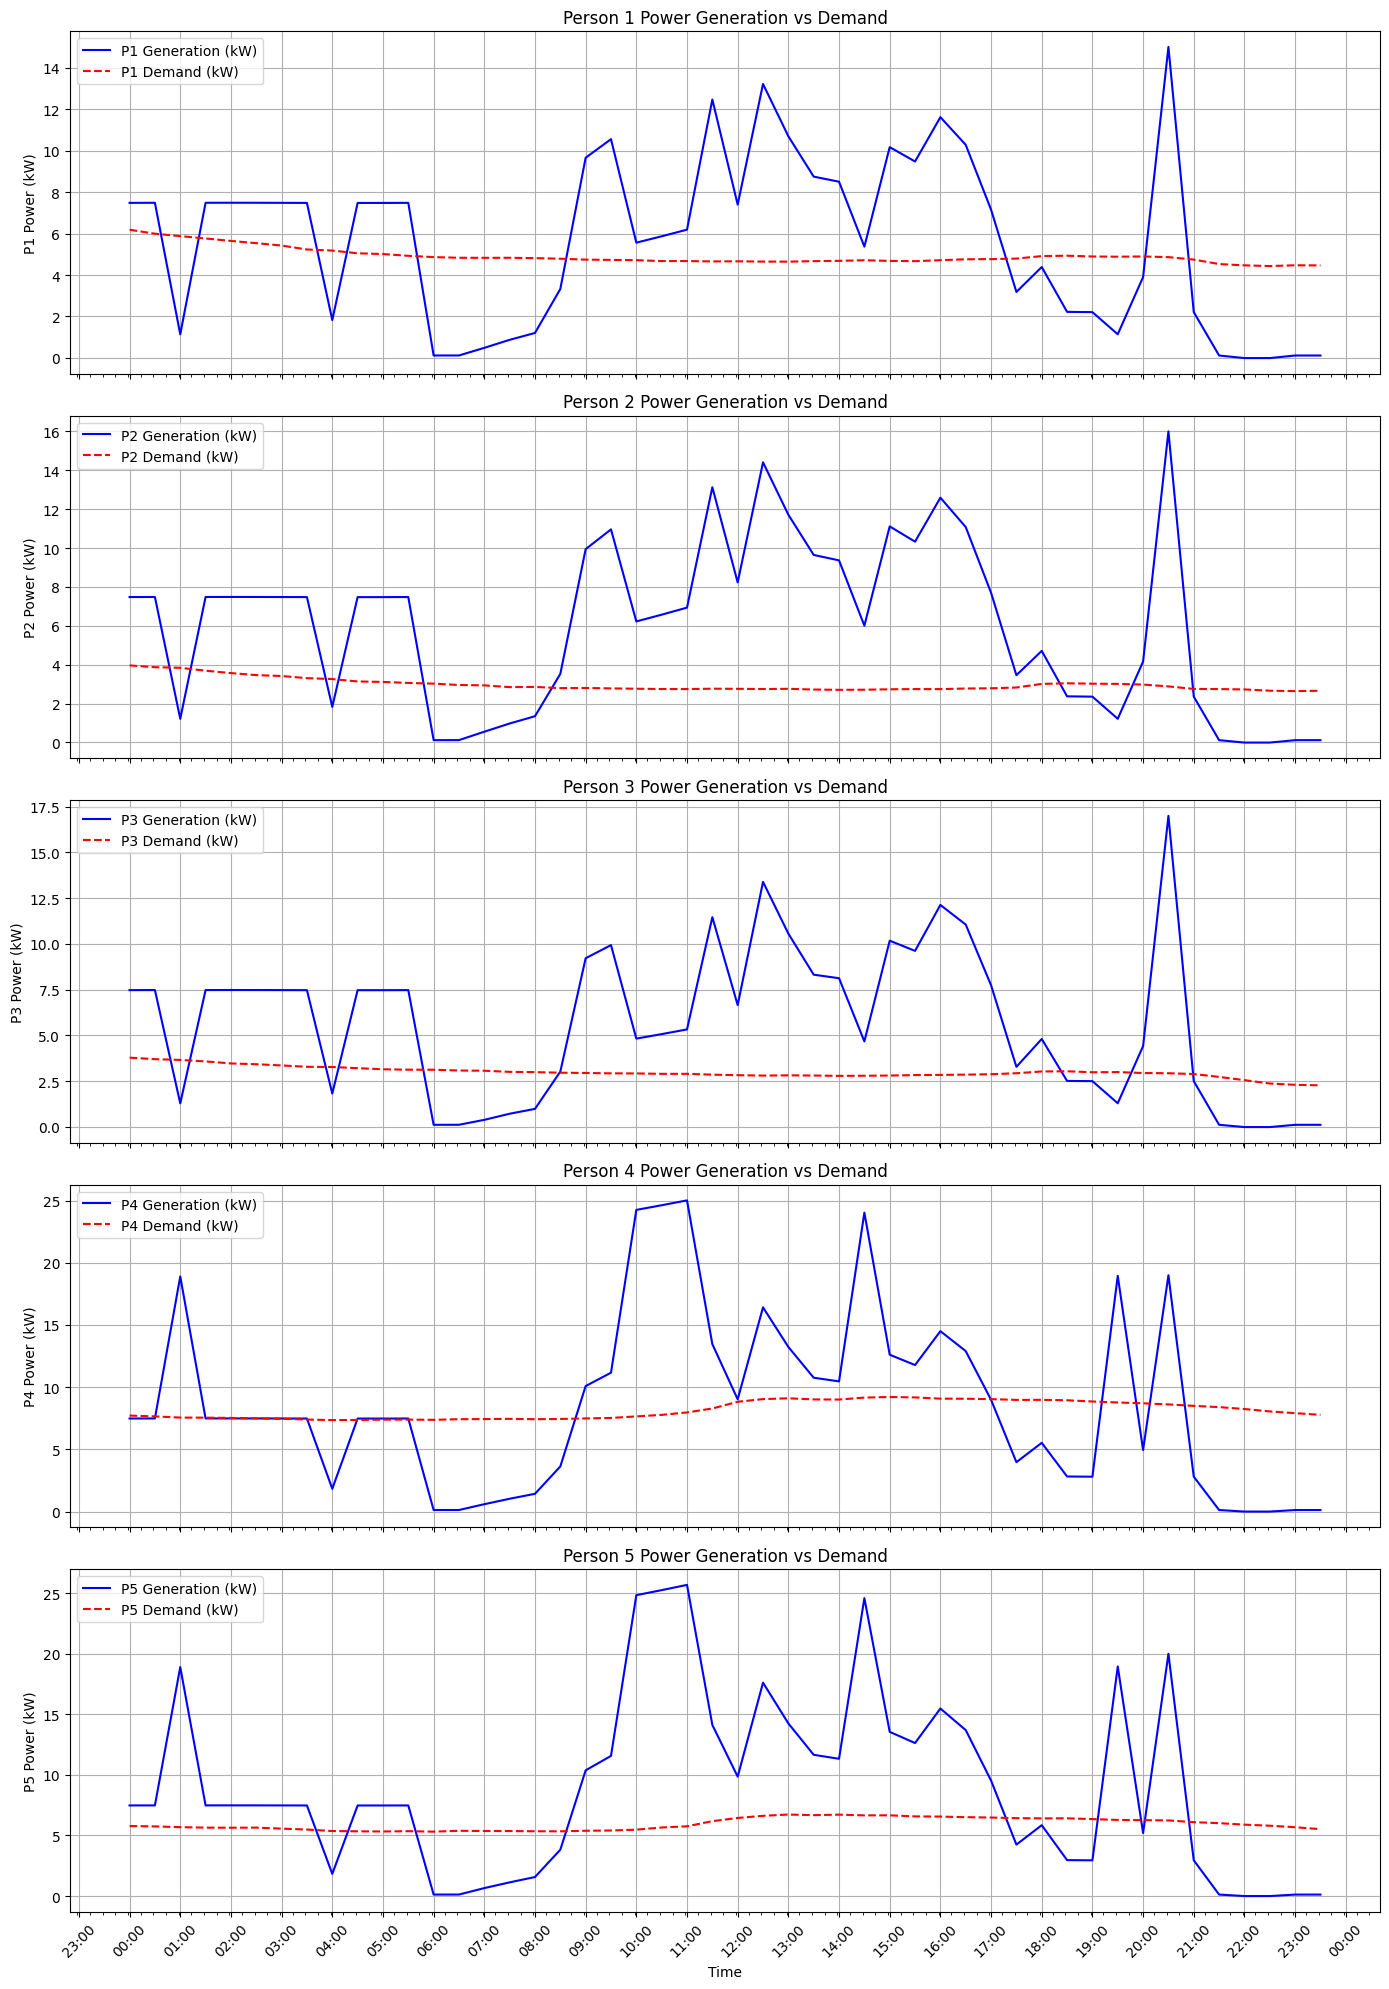

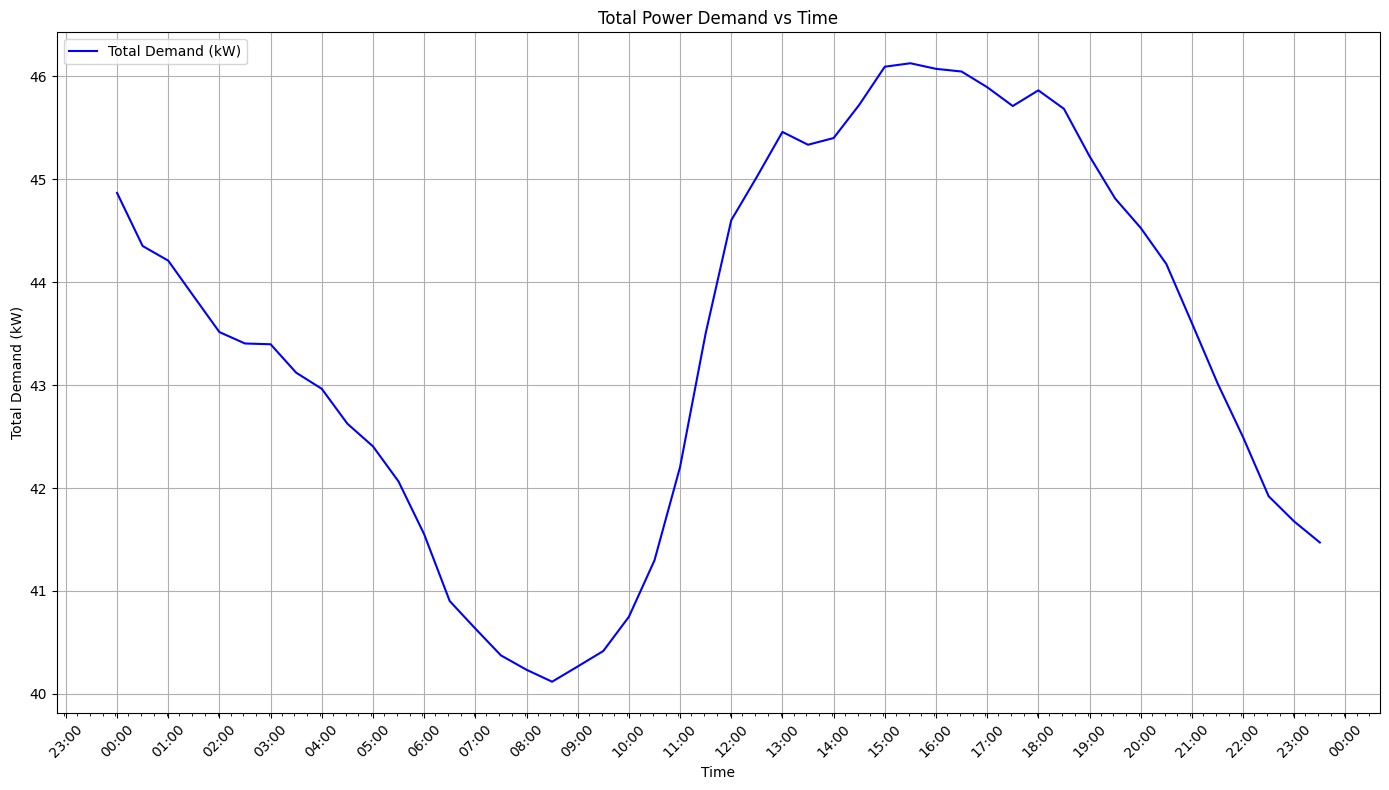

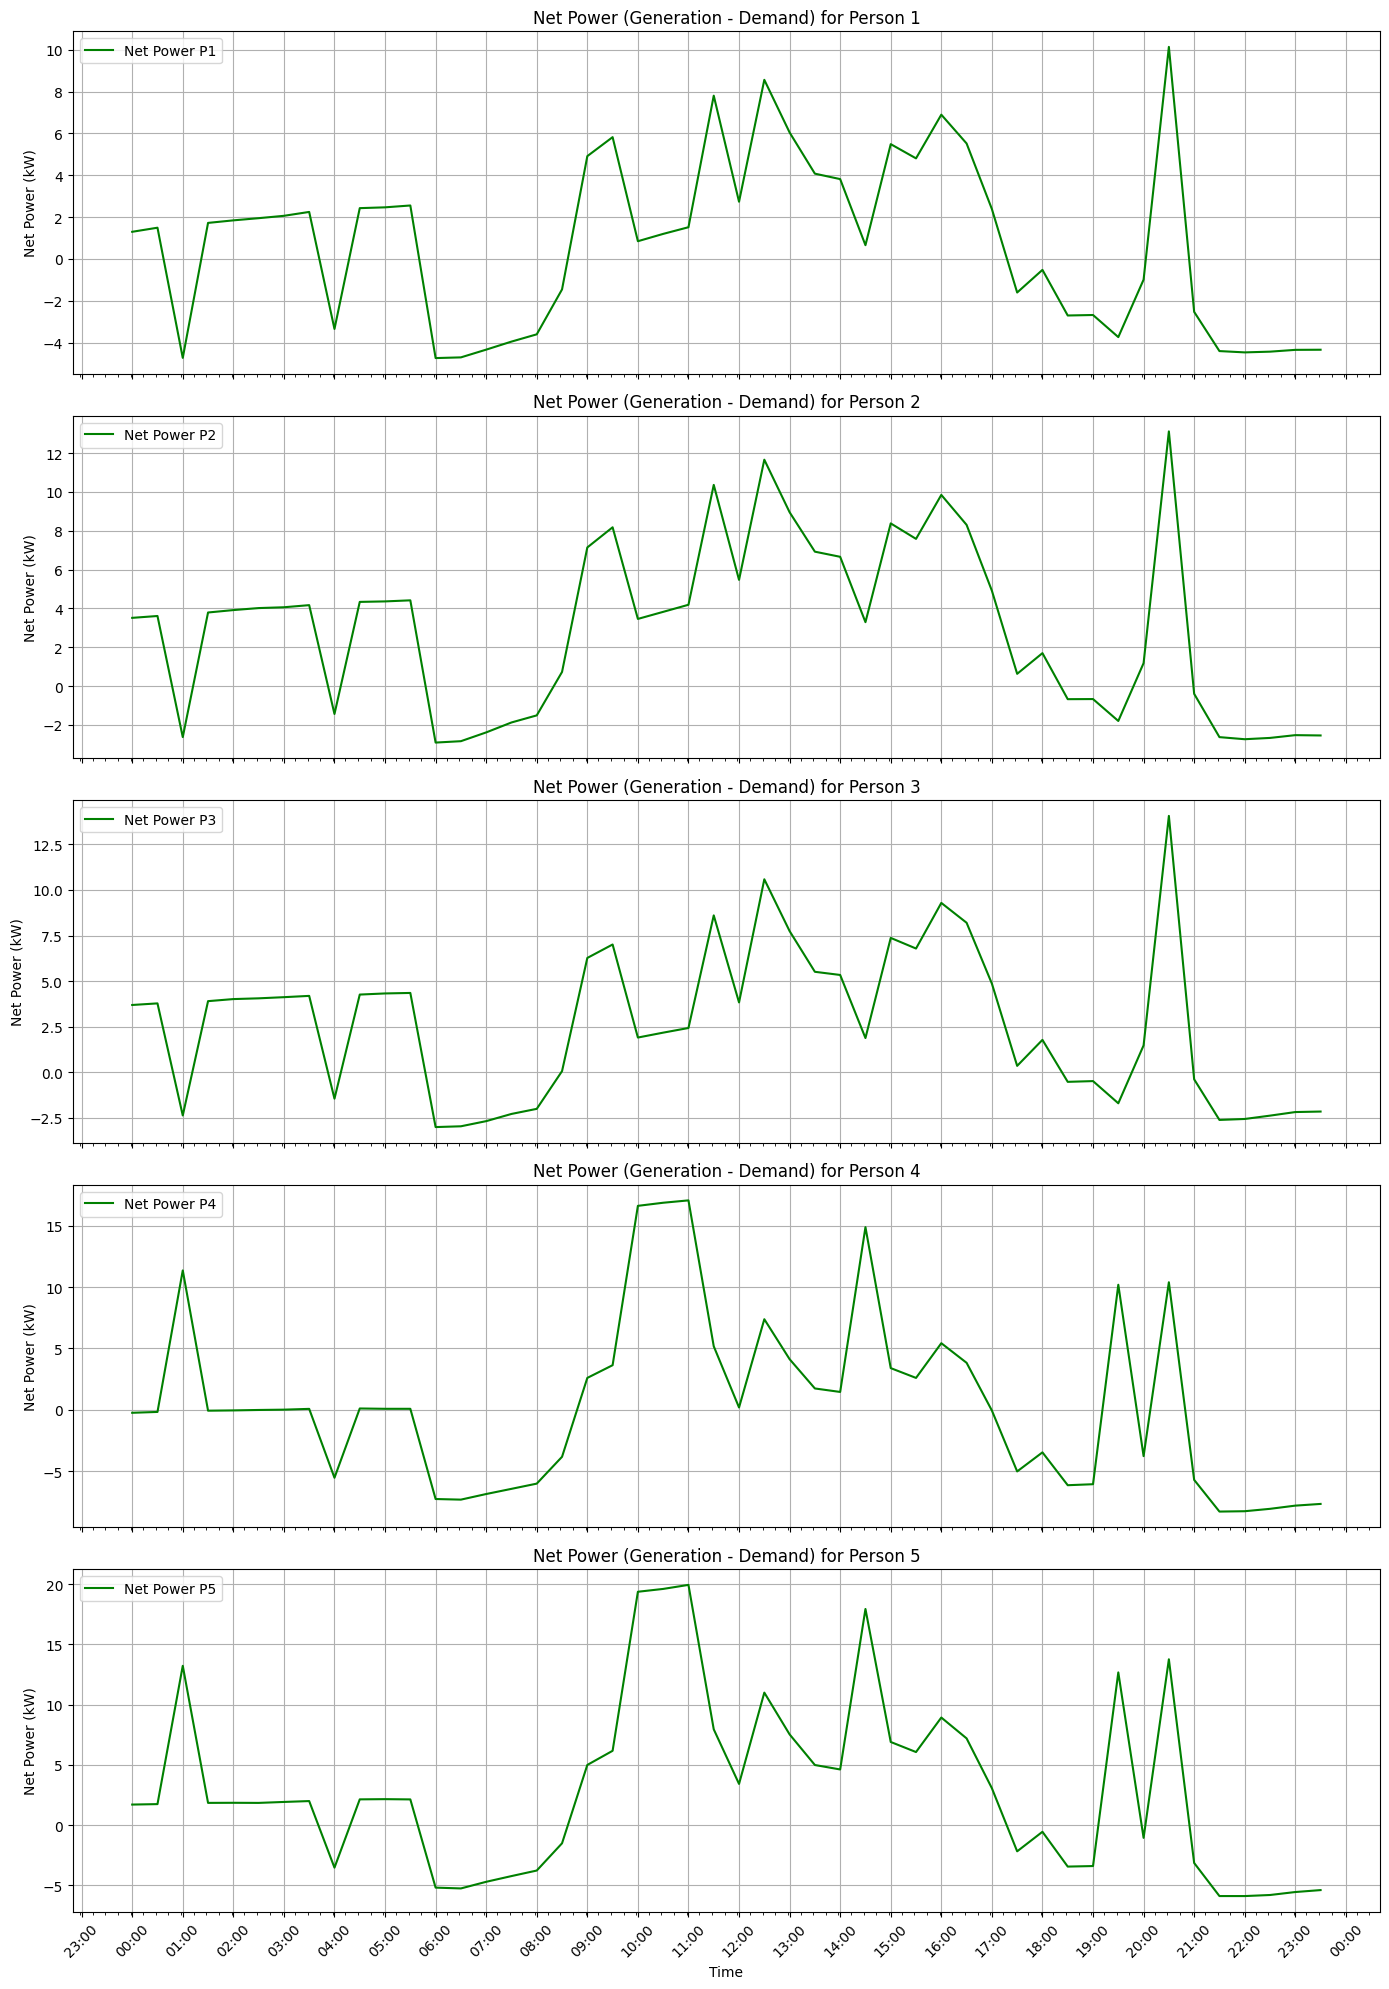

In [ ]:
import matplotlib.dates as mdates

# Plotting generation and demand for each person
fig, axs = plt.subplots(5, 1, figsize=(14, 20), sharex=True)

for i in range(1, 6):  # First 5 persons have generation data
    ax = axs[i - 1]
    ax.plot(day_data['Date_time'], day_data[f'Total_Power_P{i}'], color='blue', label=f'P{i} Generation (kW)')
    ax.plot(day_data['Date_time'], globals()[f'day_PCP{i}_pred'].ravel() / factor, color='red', linestyle='--', label=f'P{i} Demand (kW)')
    ax.set_ylabel(f'P{i} Power (kW)')
    ax.set_title(f'Person {i} Power Generation vs Demand')
    ax.legend(loc='upper left')
    ax.xaxis.set_major_locator(mdates.HourLocator())
    ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.tick_params(axis='x', rotation=45)
    ax.grid()

axs[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()

# Plot total demand for all persons
day_data['Total_Demand'] = sum([globals()[f'day_PCP{i}_pred'].ravel() / factor for i in range(1, 11)])

fig2, ax2 = plt.subplots(figsize=(14, 8))
ax2.plot(day_data['Date_time'], day_data['Total_Demand'], color='blue', label='Total Demand (kW)')
ax2.set_xlabel('Time')
ax2.set_ylabel('Total Demand (kW)')
ax2.set_title('Total Power Demand vs Time')
ax2.legend(loc='upper left')
ax2.xaxis.set_major_locator(mdates.HourLocator())
ax2.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax2.tick_params(axis='x', rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Calculate net power (generation - demand) for each person
fig3, axs3 = plt.subplots(5, 1, figsize=(14, 20), sharex=True)
for i in range(1, 6):  # First 5 persons
    net_power = day_data[f'Total_Power_P{i}'] - globals()[f'day_PCP{i}_pred'].ravel() / factor
    ax = axs3[i - 1]
    ax.plot(day_data['Date_time'], net_power, color='green', label=f'Net Power P{i}')
    ax.set_ylabel(f'Net Power (kW)')
    ax.set_title(f'Net Power (Generation - Demand) for Person {i}')
    ax.legend(loc='upper left')
    ax.xaxis.set_major_locator(mdates.HourLocator())
    ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.tick_params(axis='x', rotation=45)
    ax.grid()

axs3[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()


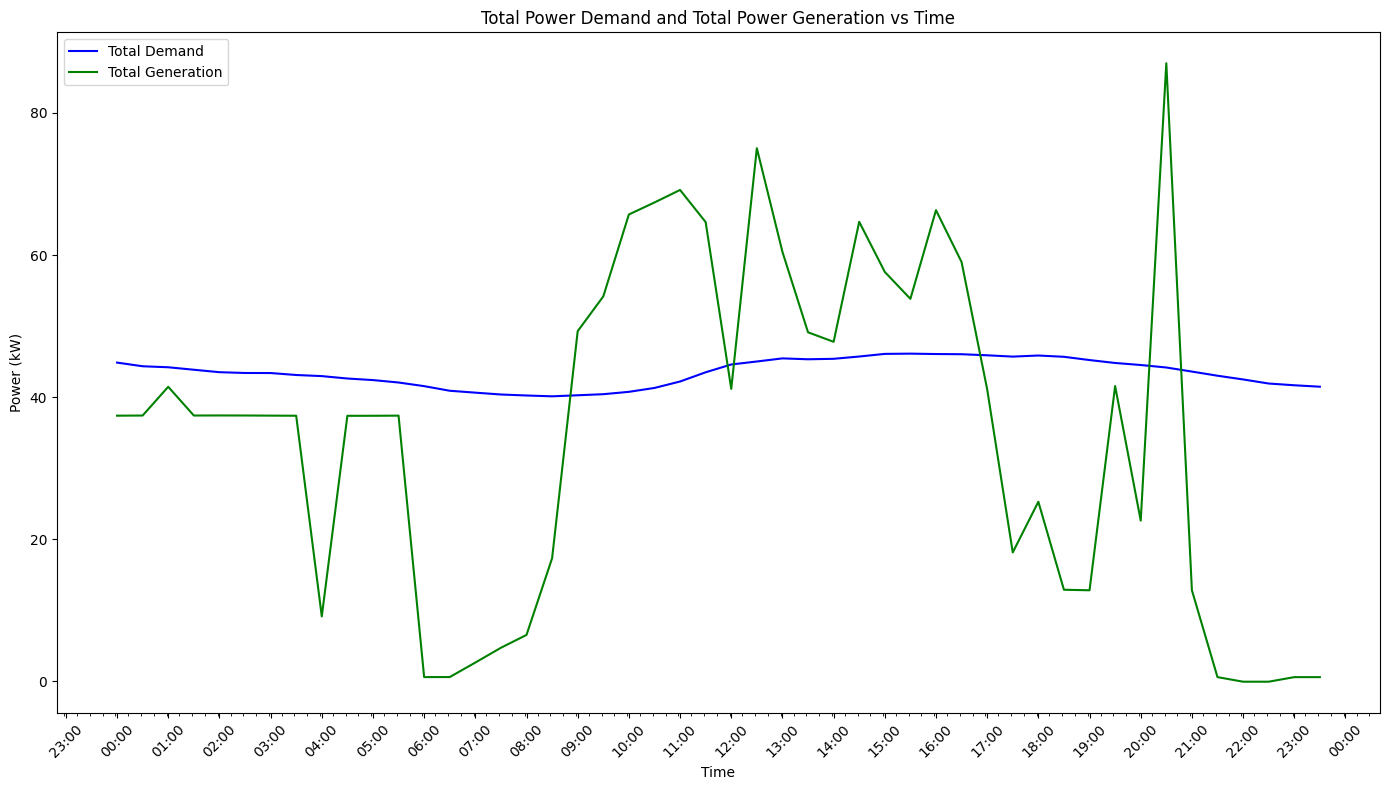

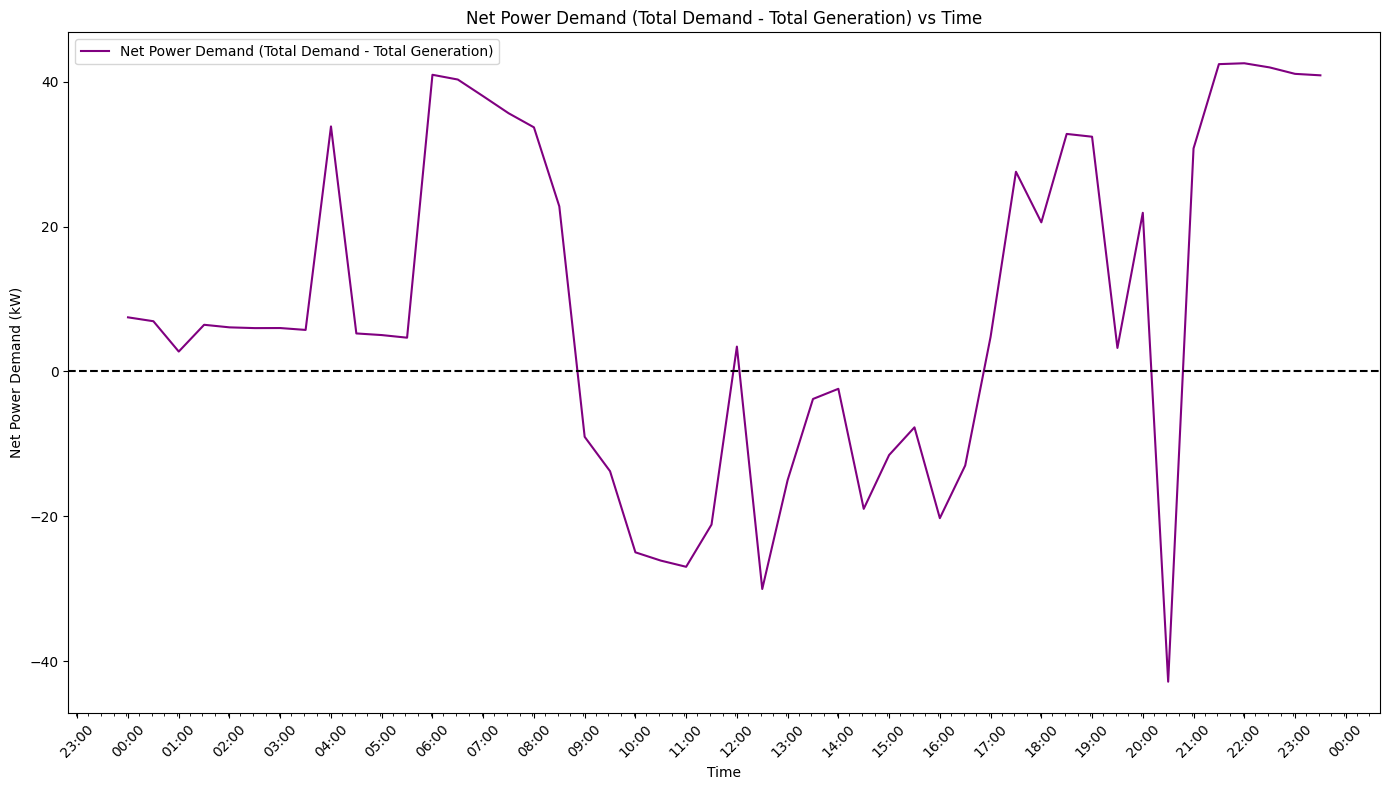

In [ ]:
# Calculate total generation by summing the total power generation for each person
day_data['Total_Generation'] = sum([day_data[f'Total_Power_P{i}'] for i in range(1, 11)])

# Plotting total demand and total generation separately
fig1, ax1 = plt.subplots(figsize=(14, 8))
ax1.plot(day_data['Date_time'], day_data['Total_Demand'], color='blue', label='Total Demand')
ax1.plot(day_data['Date_time'], day_data['Total_Generation'], color='green', label='Total Generation')
ax1.set_xlabel('Time')
ax1.set_ylabel('Power (kW)')
ax1.set_title('Total Power Demand and Total Power Generation vs Time')
ax1.legend(loc='upper left')
ax1.xaxis.set_major_locator(mdates.HourLocator())
ax1.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax1.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Calculate net power for the entire system: Total Demand - Total Generation
day_data['Net_Power'] = day_data['Total_Demand'] - day_data['Total_Generation']

# Plotting net power (Total Demand - Total Generation)
fig2, ax2 = plt.subplots(figsize=(14, 8))
ax2.plot(day_data['Date_time'], day_data['Net_Power'], color='purple', label='Net Power Demand (Total Demand - Total Generation)')
ax2.set_xlabel('Time')
ax2.set_ylabel('Net Power Demand (kW)')
ax2.set_title('Net Power Demand (Total Demand - Total Generation) vs Time')
ax2.axhline(0, color='black', linestyle='--')  # Optional: line at y=0 for reference
ax2.legend(loc='upper left')
ax2.xaxis.set_major_locator(mdates.HourLocator())
ax2.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax2.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


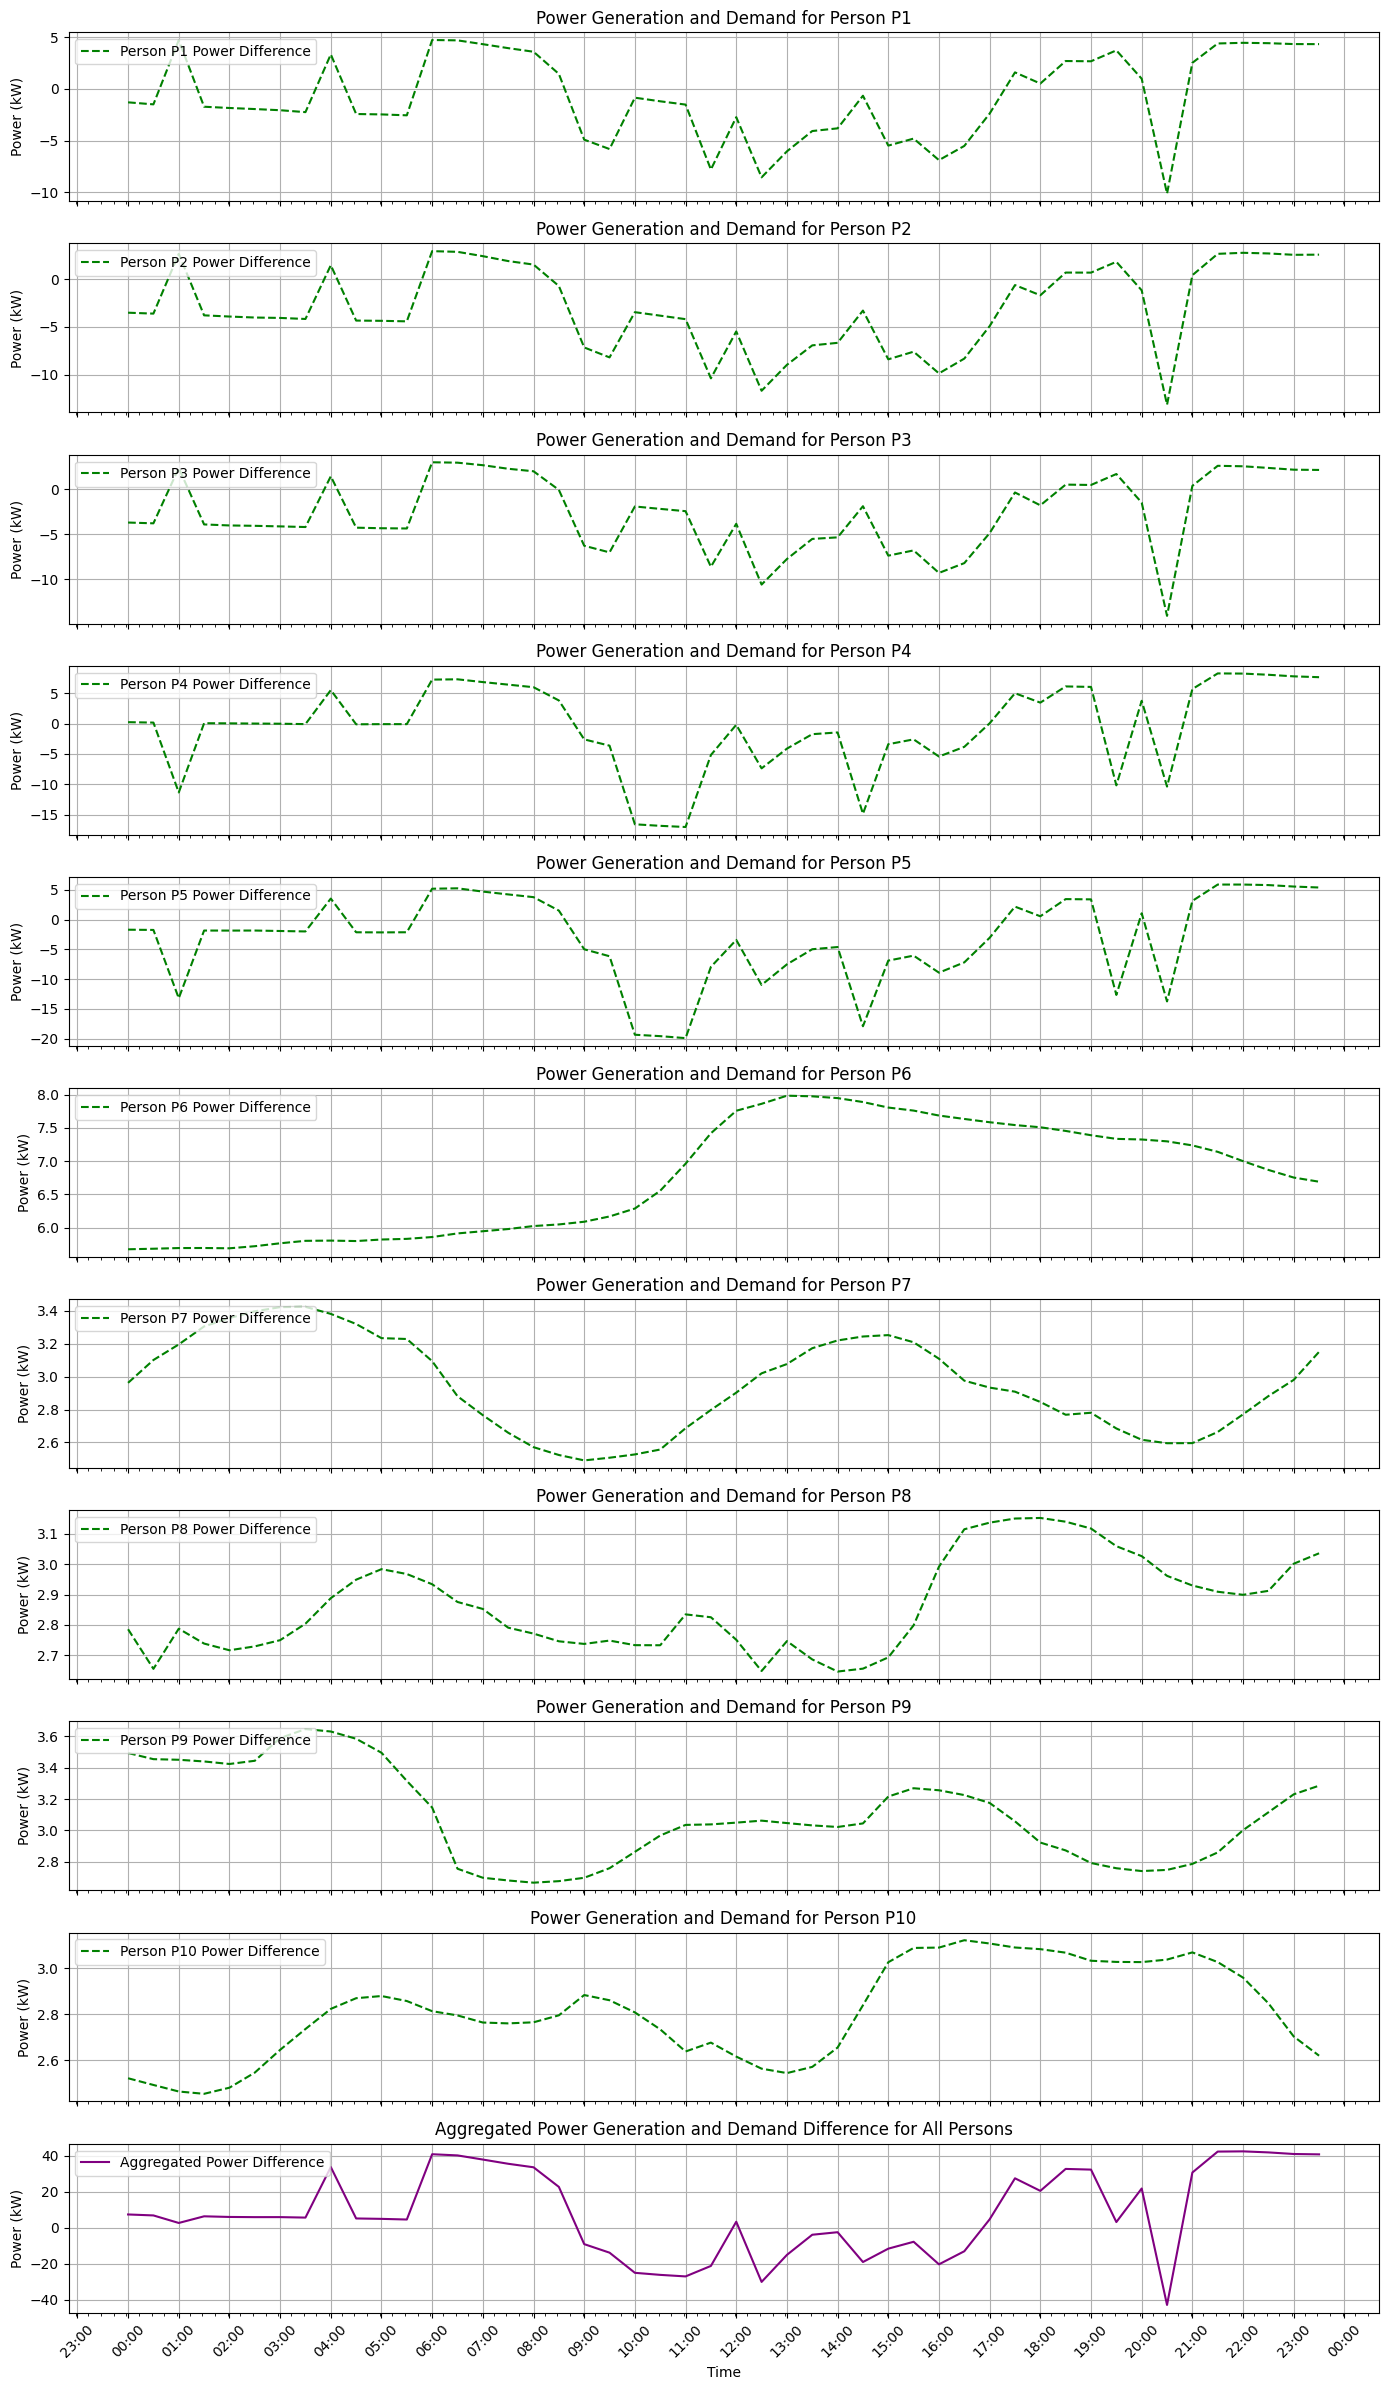

In [ ]:
# Setting up the figure with 6 subplots (one for each person + aggregated plot)
fig, axs = plt.subplots(11, 1, figsize=(14, 24), sharex=True)

# Initialize array to store the aggregated power difference
aggregated_power_difference = None

for i in range(1, 11):
    # Ensure both arrays are 2D by flattening
    total_power = day_data[f'Total_Power_P{i}'].values.flatten()
    power_demand = globals()[f'day_PCP{i}_pred'].flatten()

    # Calculate power difference for the current person
    power_difference = (power_demand /factor) - total_power

    # Accumulate the power difference for aggregated plot
    if aggregated_power_difference is None:
        aggregated_power_difference = power_difference
    else:
        aggregated_power_difference += power_difference

    # Plot power difference for each person
    axs[i - 1].plot(day_data['Date_time'], power_difference, label=f'Person P{i} Power Difference', color='green', linestyle='--')

    # Customize subplot
    axs[i - 1].set_ylabel(f'Power (kW)')
    axs[i - 1].set_title(f'Power Generation and Demand for Person P{i}')
    axs[i - 1].legend(loc='upper left')
    axs[i - 1].xaxis.set_major_locator(mdates.HourLocator())
    axs[i - 1].xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
    axs[i - 1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    axs[i - 1].tick_params(axis='x', rotation=45)
    axs[i - 1].grid()

# Plot aggregated power difference in the last subplot
axs[-1].plot(day_data['Date_time'], aggregated_power_difference, label='Aggregated Power Difference', color='purple', linestyle='-')
axs[-1].set_ylabel('Power (kW)')
axs[-1].set_title('Aggregated Power Generation and Demand Difference for All Persons')
axs[-1].legend(loc='upper left')
axs[-1].xaxis.set_major_locator(mdates.HourLocator())
axs[-1].xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
axs[-1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[-1].tick_params(axis='x', rotation=45)
axs[-1].grid()

# Shared x-axis label and layout adjustments
axs[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()


In [ ]:
# Initialize the 2D array to store demand-generation differences for all 10 persons
demand_generation_diff = np.zeros((10, 48))  # 10 rows (persons) x 48 columns (half-hour intervals)

for i in range(1, 11):  # Loop through all 10 persons
    # Extract power demand for each person
    power_demand = globals()[f'day_PCP{i}_pred'].flatten()
    power_demand  = power_demand/factor

    if i <= 5:
        # If total power is available for the first 5 persons, calculate the difference
        total_power = day_data[f'Total_Power_P{i}'].values.flatten()
        demand_generation_diff[i - 1, :] = power_demand - total_power
    else:
        # For persons 6 to 10, store demand only as generation data is unavailable
        demand_generation_diff[i - 1, :] = power_demand

# Output the demand-generation difference array
print("Demand-Generation Difference Array (10 persons, 48 half-hour intervals):")
print(demand_generation_diff)


Demand-Generation Difference Array (10 persons, 48 half-hour intervals):
[[-1.29548740e+00 -1.49098444e+00  4.73482037e+00 -1.72087049e+00
  -1.84224415e+00 -1.94659281e+00 -2.05945826e+00 -2.24540901e+00
   3.35126805e+00 -2.42653275e+00 -2.46513939e+00 -2.55353308e+00
   4.74388170e+00  4.71065283e+00  4.34030437e+00  3.95612574e+00
   3.60825109e+00  1.46012163e+00 -4.91334200e+00 -5.82168770e+00
  -8.45242023e-01 -1.19492483e+00 -1.51370573e+00 -7.80581141e+00
  -2.73319721e+00 -8.56307793e+00 -6.04598904e+00 -4.07587719e+00
  -3.81561375e+00 -6.55347824e-01 -5.48723745e+00 -4.80713415e+00
  -6.89656258e+00 -5.51942730e+00 -2.38391781e+00  1.60805058e+00
   5.26033878e-01  2.70731401e+00  2.68405414e+00  3.74038815e+00
   9.93554354e-01 -1.01381931e+01  2.53357553e+00  4.40911341e+00
   4.47183037e+00  4.43689394e+00  4.35087061e+00  4.34486389e+00]
 [-3.51528406e+00 -3.61058545e+00  2.62450767e+00 -3.79107046e+00
  -3.91558790e+00 -4.01874924e+00 -4.06096506e+00 -4.16965342e+00
  

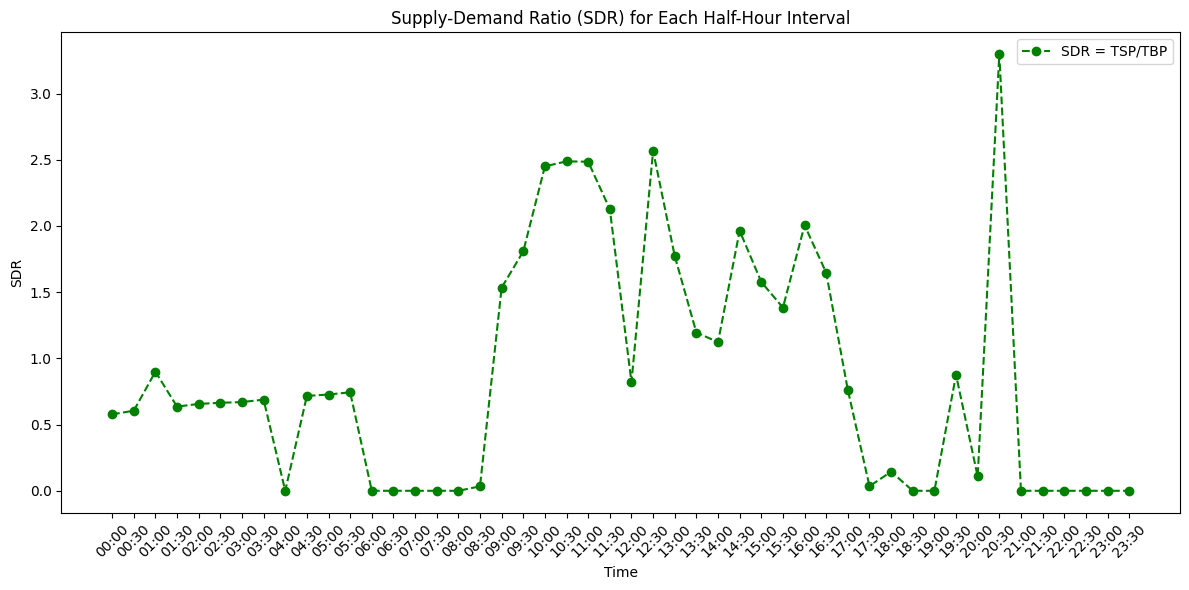

In [ ]:
# Initialize the 2D array to store demand-generation differences for all 10 persons
demand_generation_diff = np.zeros((10, 48))

for i in range(1, 11):  # Loop through all 10 persons
    power_demand = globals()[f'day_PCP{i}_pred'].flatten()
    power_demand = power_demand / factor
    if i <= 5:
        total_power = day_data[f'Total_Power_P{i}'].values.flatten()
        demand_generation_diff[i - 1, :] = power_demand - total_power
    else:
        demand_generation_diff[i - 1, :] = power_demand

# Initialize array for SDR values at each half-hour interval
SDR = np.zeros(48)

for j in range(48):  # Loop through each half-hour interval
    TSP = np.sum(demand_generation_diff[:, j][demand_generation_diff[:, j] < 0])  # Total negative values
    TBP = np.sum(demand_generation_diff[:, j][demand_generation_diff[:, j] >= 0])  # Total positive values
    SDR[j] = abs(TSP) / TBP if TBP != 0 else 0  # Avoid division by zero

# Create time labels for each half-hour interval from 00:00 to 23:30
time_labels = pd.date_range("00:00", "23:30", freq="30min").strftime("%H:%M")

# Plot SDR with custom x-axis labels
plt.figure(figsize=(12, 6))
plt.plot(SDR, marker='o', color='green', linestyle='--', label='SDR = TSP/TBP')
plt.xticks(ticks=range(48), labels=time_labels, rotation=45)  # Set custom x-ticks for time intervals
plt.xlabel('Time')
plt.ylabel('SDR')
plt.title('Supply-Demand Ratio (SDR) for Each Half-Hour Interval')
plt.legend()
plt.tight_layout()  # Adjust layout to avoid overlapping x-axis labels
plt.show()


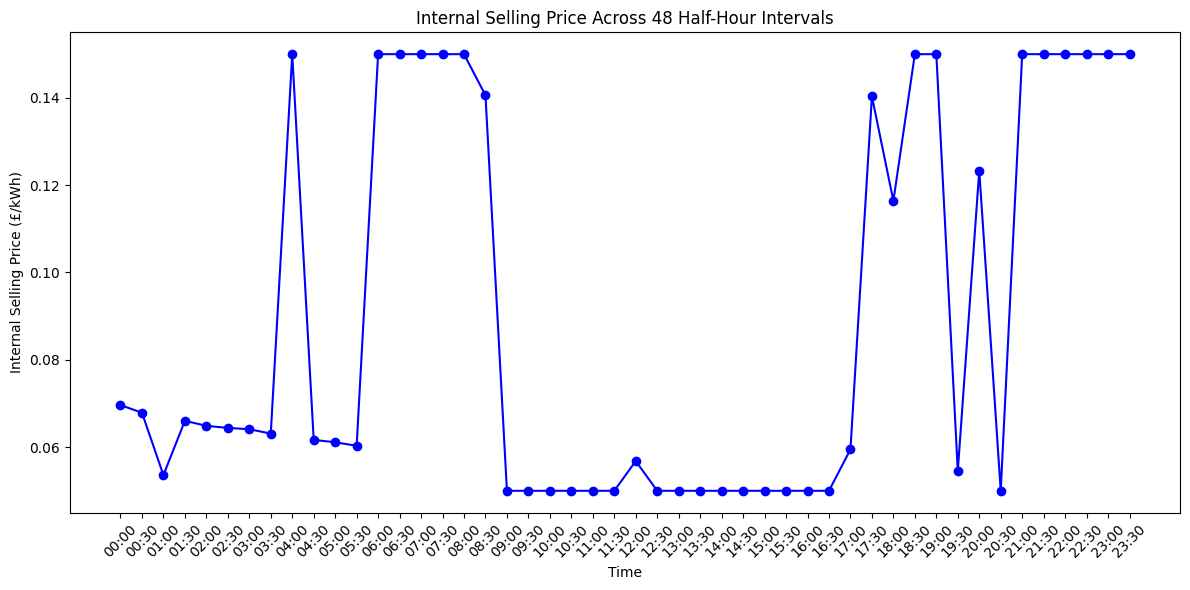

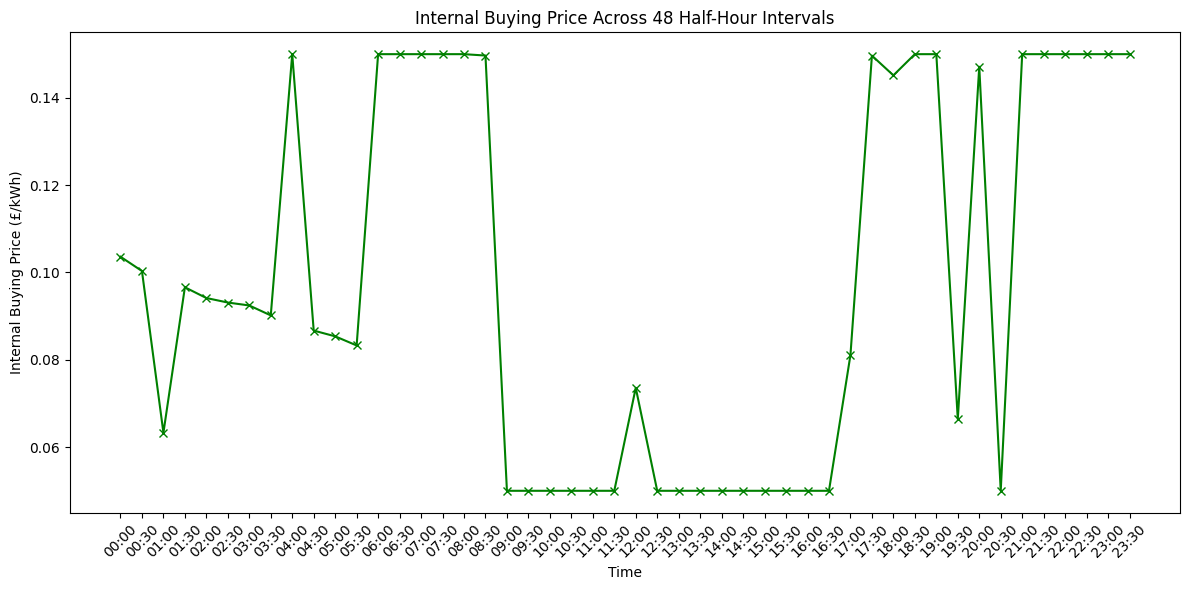

In [ ]:
# Assuming SDR is a pre-defined 48-length vector
# SDR = [values]

# Constants for utility grid prices
lambda_buy = 0.15  # Buying price from utility grid (e.g., £/kWh)
lambda_sell = 0.05  # Selling price to utility grid (e.g., £/kWh)

# Initialize arrays to store internal buying and selling prices
Pr_sell = np.zeros(48)
Pr_buy = np.zeros(48)

# Calculate internal prices based on SDR
for h in range(48):
    if SDR[h] <= 1:
        Pr_sell[h] = (lambda_buy * lambda_sell) / ((lambda_buy - lambda_sell) * SDR[h] + lambda_sell)
        Pr_buy[h] = Pr_sell[h] * SDR[h] + lambda_buy * (1 - SDR[h])
    else:
        Pr_sell[h] = lambda_sell
        Pr_buy[h] = lambda_sell

# Create time labels for each half-hour interval from 00:00 to 23:30
time_labels = pd.date_range("00:00", "23:30", freq="30min").strftime("%H:%M")

# Plotting the internal selling price with custom x-axis labels
plt.figure(figsize=(12, 6))
plt.plot(Pr_sell, marker='o', color='blue')
plt.xticks(ticks=range(48), labels=time_labels, rotation=45)  # Set custom x-ticks for time intervals
plt.xlabel("Time")
plt.ylabel("Internal Selling Price (£/kWh)")
plt.title("Internal Selling Price Across 48 Half-Hour Intervals")
# plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

# Plotting the internal buying price with custom x-axis labels
plt.figure(figsize=(12, 6))
plt.plot(Pr_buy, marker='x', color='green')
plt.xticks(ticks=range(48), labels=time_labels, rotation=45)  # Set custom x-ticks for time intervals
plt.xlabel("Time")
plt.ylabel("Internal Buying Price (£/kWh)")
plt.title("Internal Buying Price Across 48 Half-Hour Intervals")
# plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()


In [ ]:
# Calculate total demand for each person
for i in range(1, 11):
      day_data[f'Total_Demand_P{i}'] = ((globals()[f'day_PCP{i}_pred'].ravel() / factor) - (day_data[f'P_PV_forecasted_P{i}'] + day_data[f'Wind_forecasted_P{i}']))


**Conventional Method (P2G)**

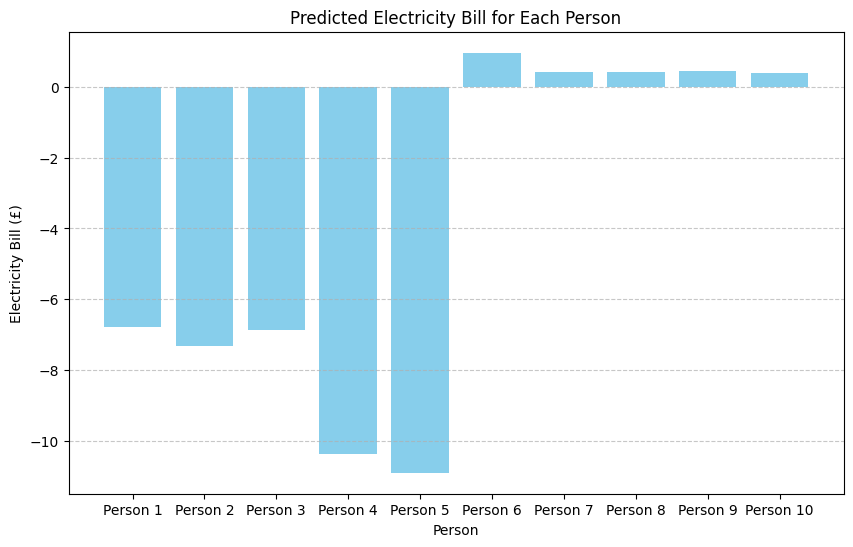

In [ ]:
# Define constants for electricity prices (e.g., assumed values)
c_BFG = 0.15  # Cost per kWh for importing from the grid (in dollars)
c_STG = 0.05  # Selling price per kWh for exporting to the grid (in dollars)

# Initialize an empty list to store each person's bill
bills = []

# Calculate the electricity bill for each person
for i in range(1, 11):  # Assuming there are 5 people, adjust the range as needed
    # Calculate M^n(t), P_im^n(t), and P_ex^n(t) for each person at each time step
    totalGeneration = day_data[f'P_PV_forecasted_P{i}'] + day_data[f'Wind_forecasted_P{i}']
    day_data[f'M_PV_P{i}'] = np.minimum(day_data[f'Total_Demand_P{i}']/factor, totalGeneration)
    day_data[f'P_im_P{i}'] = day_data[f'Total_Demand_P{i}']/factor - day_data[f'M_PV_P{i}']
    day_data[f'P_ex_P{i}'] = totalGeneration - day_data[f'M_PV_P{i}']

    # Calculate total imported and exported energy for the person
    E_im_total = (day_data[f'P_im_P{i}'] * 0.5).sum()
    E_ex_total = (day_data[f'P_ex_P{i}'] * 0.5).sum()

    # Calculate the bill for each person using the formula
    bill = (E_im_total * c_BFG) - (E_ex_total * c_STG)
    bills.append(bill)

# Plot the electricity bill for each person
persons = [f'Person {i}' for i in range(1, 11)]
plt.figure(figsize=(10, 6))
plt.bar(persons, bills, color='skyblue')
plt.xlabel('Person')
plt.ylabel('Electricity Bill (£)')
plt.title('Predicted Electricity Bill for Each Person')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**P2P energy sharing**

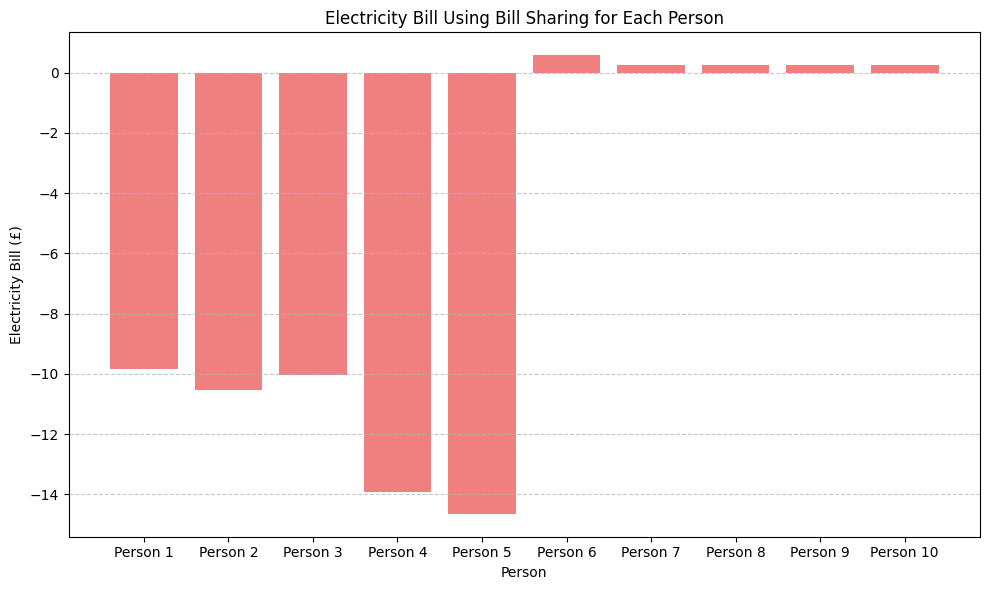

In [ ]:
# Constants
time_interval = 0.5  # Half-hour intervals

# Number of people
N = 10

# Initialize a list to store each person's bill
bills_isp_ibp = []

# Calculate the bill for each person
for i in range(1, N + 1):
    # Imported and exported power for each person at each time step
    P_im_person = day_data[f'P_im_P{i}'].values  # Imported power at each time step
    P_ex_person = day_data[f'P_ex_P{i}'].values  # Exported power at each time step

    # Calculate the bill for the person using ISP and IBP
    bill = np.sum(P_im_person * Pr_sell * time_interval) - np.sum(P_ex_person * Pr_buy * time_interval)
    bills_isp_ibp.append(bill)

# Plot the electricity bill for each person
persons = [f'Person {i}' for i in range(1, N + 1)]
plt.figure(figsize=(10, 6))
plt.bar(persons, bills_isp_ibp, color='lightcoral')
plt.xlabel('Person')
plt.ylabel('Electricity Bill (£)')
plt.title('Electricity Bill Using Bill Sharing for Each Person')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Rough

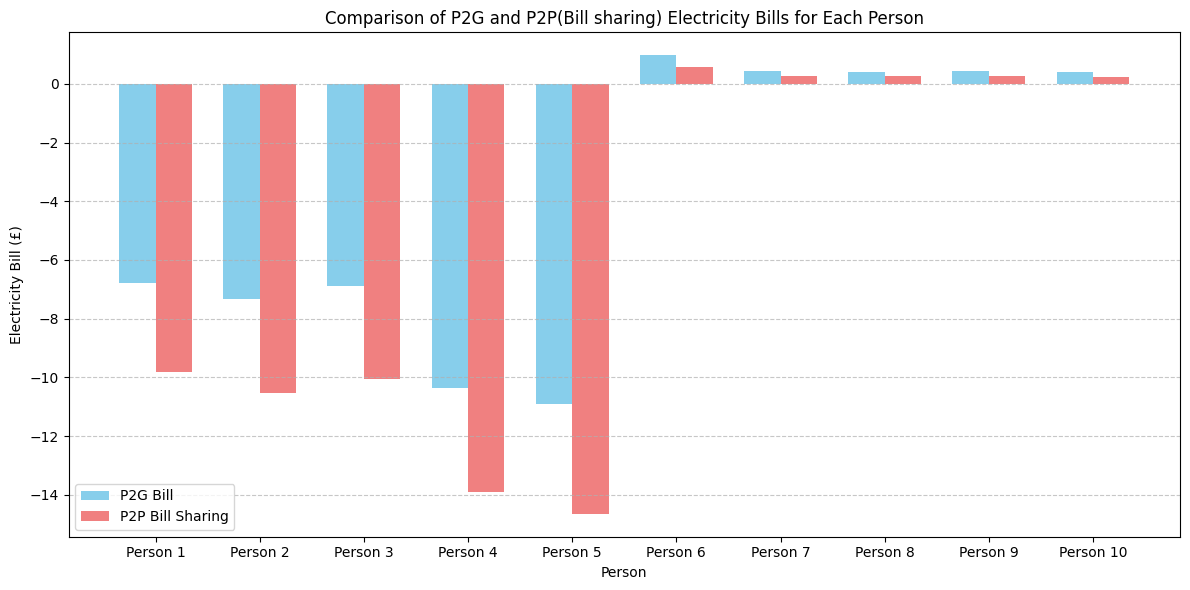

In [ ]:
# Define the persons
persons = [f'Person {i}' for i in range(1, 11)]
x = np.arange(len(persons))  # Positions for the x-axis
width = 0.35  # Width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Add bars for P2G bills
bar1 = ax.bar(x - width/2, bills, width, label='P2G Bill', color='skyblue')

# Add bars for P2P bills
bar2 = ax.bar(x + width/2, bills_isp_ibp, width, label='P2P Bill Sharing', color='lightcoral')

# Add labels, title, and legend
ax.set_xlabel('Person')
ax.set_ylabel('Electricity Bill (£)')
ax.set_title('Comparison of P2G and P2P(Bill sharing) Electricity Bills for Each Person')
ax.set_xticks(x)
ax.set_xticklabels(persons)
ax.legend()

# Display gridlines for clarity
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
N = 10
# Data storage
data = {
    "Customer": [f"Customer {i}" for i in range(1, N + 1)],
    "Energy Buy (kWh)": [],
    "Energy Sell (kWh)": [],
    "Buy Price (£/kWh)": [],
    "Sell Price (£/kWh)": [],
    "Cost (P2G) (£)": [],
    "Buy Price (P2P) (£/kWh)": [],
    "Sell Price (P2P) (£/kWh)": [],
    "Cost (P2P) (£)": []
}

# P2G calculation
for i in range(1, N + 1):
    E_buy = (day_data[f'P_im_P{i}'] * 0.5).sum()
    E_sell = (day_data[f'P_ex_P{i}'] * 0.5).sum()
    cost_p2g = (E_buy * c_BFG) - (E_sell * c_STG)

    data["Energy Buy (kWh)"].append(E_buy)
    data["Energy Sell (kWh)"].append(-E_sell)  # Negative to match the table
    data["Buy Price (£/kWh)"].append(c_BFG)
    data["Sell Price (£/kWh)"].append(c_STG)
    data["Cost (P2G) (£)"].append(round(cost_p2g, 2))

# P2P calculation
for i in range(1, N + 1):
    P_im = day_data[f'P_im_P{i}'].values
    P_ex = day_data[f'P_ex_P{i}'].values
    cost_p2p = np.sum(P_im * Pr_buy * 0.5) - np.sum(P_ex * Pr_sell * 0.5)

    data["Buy Price (P2P) (£/kWh)"].append(round(Pr_buy.mean(), 3))
    data["Sell Price (P2P) (£/kWh)"].append(round(Pr_sell.mean(), 3))
    data["Cost (P2P) (£)"].append(round(cost_p2p, 2))

# Create DataFrame
df = pd.DataFrame(data)

# Add totals
totals = {
    "Customer": "Total",
    "Energy Buy (kWh)": round(df["Energy Buy (kWh)"].sum(), 2),
    "Energy Sell (kWh)": round(df["Energy Sell (kWh)"].sum(), 2),
    "Buy Price (£/kWh)": "-",
    "Sell Price (£/kWh)": "-",
    "Cost (P2G) (£)": round(df["Cost (P2G) (£)"].sum(), 2),
    "Buy Price (P2P) (£/kWh)": "-",
    "Sell Price (P2P) (£/kWh)": "-",
    "Cost (P2P) (£)": round(df["Cost (P2P) (£)"].sum(), 2)
}
df = pd.concat([df, pd.DataFrame([totals])], ignore_index=True)

# Display table
print(df)

# Save to Excel or CSV if needed
df.to_excel("Electricity_Bill_Comparison.xlsx", index=False)


       Customer  Energy Buy (kWh)  Energy Sell (kWh) Buy Price (£/kWh)  \
0    Customer 1          0.336479        -136.736176              0.15   
1    Customer 2          0.113144        -146.715256              0.15   
2    Customer 3          0.104524        -137.791916              0.15   
3    Customer 4          0.798521        -209.760544              0.15   
4    Customer 5          0.487478        -219.692627              0.15   
5    Customer 6          6.480436          -0.000000              0.15   
6    Customer 7          2.843024          -0.000000              0.15   
7    Customer 8          2.757749          -0.000000              0.15   
8    Customer 9          2.978461          -0.000000              0.15   
9   Customer 10          2.705870          -0.000000              0.15   
10        Total         19.610001        -850.700012                 -   

   Sell Price (£/kWh)  Cost (P2G) (£) Buy Price (P2P) (£/kWh)  \
0                0.05           -6.79         

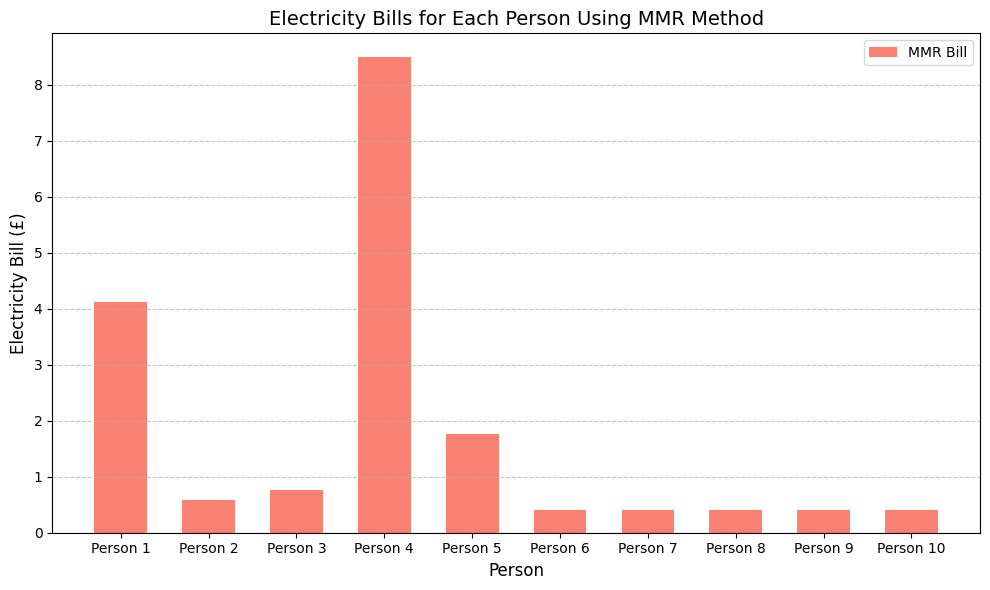

In [ ]:
# Constants
c_BFG = 0.15  # Grid buying price (£/kWh)
c_STG = 0.05  # Grid selling price (£/kWh)
time_interval = 0.5  # Half-hour intervals
N = 10  # Number of persons

# Calculate the mid-market rate
c_p2p = (c_BFG + c_STG) / 2

# Initialize lists to store results
bills_mmr = []

# Calculate bills using MMR for each person
for i in range(1, N + 1):
    # Imported and exported power for each person at each time step
    # P_im = day_data[f'P_im_P{i}'].values  # Imported power
    # P_ex = day_data[f'P_ex_P{i}'].values  # Exported power
    L_t = day_data[f'Total_Demand_P{i}'].values / factor  # Demand
    P_gen = (day_data[f'P_PV_forecasted_P{i}'] + day_data[f'Wind_forecasted_P{i}']).values  # Generation

    c_im_dynamic = []
    c_ex_dynamic = []

    for t in range(48):
        # Case 1: PV generation equal to demand
        if P_gen[t] == L_t[t]:
            c_im_dynamic.append(c_p2p)
            c_ex_dynamic.append(c_p2p)

        # Case 2: PV generation higher than demand
        elif P_gen[t] > L_t[t]:
            numerator = np.sum(L_t) * c_p2p + (np.sum(P_gen) - np.sum(L_t)) * c_STG
            c_im_dynamic.append(c_p2p)
            c_ex_dynamic.append(numerator / np.sum(P_gen))

        # Case 3: PV generation lower than demand
        elif P_gen[t] < L_t[t]:
            numerator = np.sum(P_gen) * c_p2p + (np.sum(L_t) - np.sum(P_gen)) * c_BFG
            c_im_dynamic.append(numerator / np.sum(L_t))
            c_ex_dynamic.append(c_p2p)

    # Calculate the electricity bill using MMR method
    bill_mmr = np.sum(P_im * np.array(c_im_dynamic) * time_interval) - np.sum(P_ex * np.array(c_ex_dynamic) * time_interval)
    bills_mmr.append(bill_mmr)

# Constants
persons = [f'Person {i}' for i in range(1, N + 1)]  # Names of individuals
x = np.arange(len(persons))  # x-axis positions for the bar chart

# Plotting the MMR bills
plt.figure(figsize=(10, 6))

# MMR bills
plt.bar(x, bills_mmr, color='salmon', width=0.6, label='MMR Bill')

# Add titles and labels
plt.xlabel('Person', fontsize=12)
plt.ylabel('Electricity Bill (£)', fontsize=12)
plt.title('Electricity Bills for Each Person Using MMR Method', fontsize=14)
plt.xticks(x, persons, rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend(fontsize=10)

# Optimize layout and show the plot
plt.tight_layout()
plt.show()

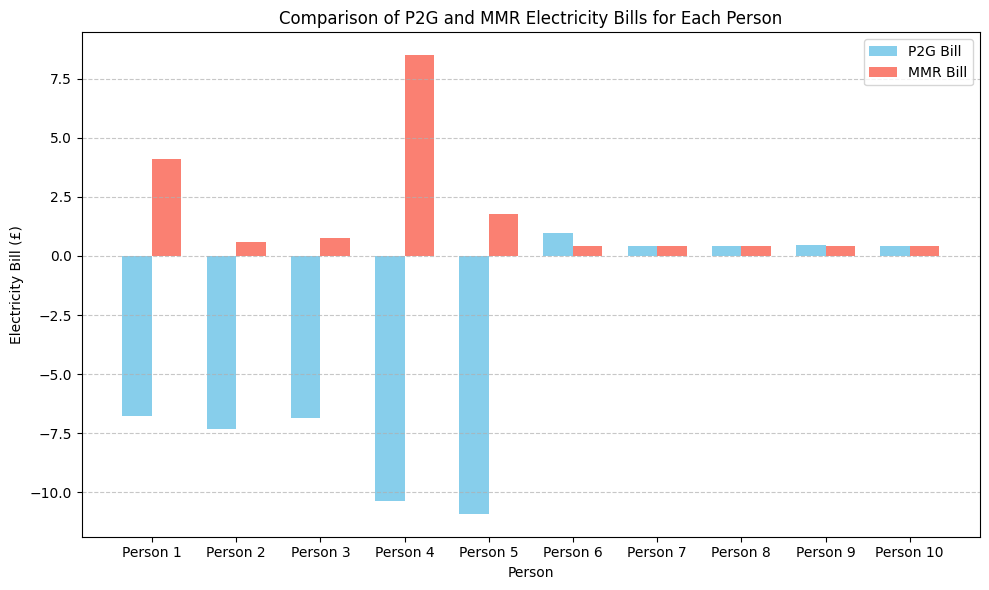

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume `bills_mmr` and `bills` (P2G bills) are already calculated from the previous computations

# Visualization of comparison
persons = [f'Person {i}' for i in range(1, 11)]  # Names of individuals
x = np.arange(len(persons))  # x-axis positions for bar chart
bar_width = 0.35  # Width of each bar

plt.figure(figsize=(10, 6))

# Plot P2G bills
# plt.bar(x - bar_width / 2, bills, width=bar_width, label='P2G Bill', color='skyblue')
plt.bar(x - bar_width / 2, bills, width=bar_width, label='P2G Bill', color='skyblue')

# Plot MMR bills
plt.bar(x + bar_width / 2, bills_mmr, width=bar_width, label='MMR Bill', color='salmon')

# Add labels, title, and legend
plt.xlabel('Person')
plt.ylabel('Electricity Bill (£)')
plt.title('Comparison of P2G and MMR Electricity Bills for Each Person')
plt.xticks(x, persons, rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optimize layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Initialize data storage for the table
table_data = {
    "Customer": [],
    "Buy (kWh)": [],
    "Sell (kWh)": [],
    "Buy Price (£/kWh)": [],
    "Sell Price (£/kWh)": [],
    "Buy Cost (£)": [],
    "Sell Cost (£)": [],
    "Net Cost (£)": [],
}

# Populate the table data
for i in range(1, N + 1):
    # Imported and exported power for each person at each time step
    P_im = day_data[f'P_im_P{i}'].values  # Imported power
    P_ex = day_data[f'P_ex_P{i}'].values  # Exported power
    L_t = day_data[f'Total_Demand_P{i}'].values / factor  # Demand
    P_gen = (day_data[f'P_PV_forecasted_P{i}'] + day_data[f'Wind_forecasted_P{i}']).values  # Generation

    # Dynamic buy and sell prices
    c_im_dynamic = []
    c_ex_dynamic = []

    for t in range(len(P_im)):
        if P_gen[t] == L_t[t]:
            c_im_dynamic.append(c_p2p)
            c_ex_dynamic.append(c_p2p)
        elif P_gen[t] > L_t[t]:
            c_im_dynamic.append(c_p2p)
            numerator = np.sum(L_t * c_p2p) + (np.sum(P_gen) - np.sum(L_t)) * c_STG
            denomimator =  np.sum(P_gen)
            c_ex_dynamic.append(numerator / denomimator)
        else:
            numerator = np.sum(P_gen) * c_p2p + (np.sum(L_t) - np.sum(P_gen)) * c_BFG
            c_im_dynamic.append(numerator / np.sum(L_t))
            c_ex_dynamic.append(c_p2p)

    # Calculate total buy and sell (in kWh)
    total_buy = np.sum(P_im) * time_interval
    total_sell = np.sum(P_ex) * time_interval

    # Safely calculate average dynamic buy and sell prices
    avg_buy_price = np.average(c_im_dynamic, weights=P_im) if np.sum(P_im) > 0 else 0
    avg_sell_price = np.average(c_ex_dynamic, weights=P_ex) if np.sum(P_ex) > 0 else 0

    # Handle infinite values explicitly
    if not np.isfinite(avg_buy_price):
        avg_buy_price = 0
    if not np.isfinite(avg_sell_price):
        avg_sell_price = 0

    # Calculate total costs
    buy_cost = total_buy * avg_buy_price
    sell_cost = total_sell * avg_sell_price
    net_cost = buy_cost - sell_cost

    # Append data for the table
    table_data["Customer"].append(f"Person {i}")
    table_data["Buy (kWh)"].append(total_buy)
    table_data["Sell (kWh)"].append(total_sell)
    table_data["Buy Price (£/kWh)"].append(round(avg_buy_price, 3))
    table_data["Sell Price (£/kWh)"].append(round(avg_sell_price, 3))
    table_data["Buy Cost (£)"].append(round(buy_cost, 2))
    table_data["Sell Cost (£)"].append(round(sell_cost, 2))
    table_data["Net Cost (£)"].append(round(net_cost, 2))

# Add totals to the table
df_mmr = pd.DataFrame(table_data)
df_mmr.loc["Total"] = df_mmr.iloc[:, 1:].sum(numeric_only=True)
df_mmr.loc["Total", "Customer"] = "Total"

# Display the table
print(df_mmr)

# Optionally, save the table to a CSV
# df_mmr.to_excel("MMR_Bills_Table1.xlsx", index=False)

        Customer  Buy (kWh)  Sell (kWh)  Buy Price (£/kWh)  \
0       Person 1   0.336479  136.736176              9.692   
1       Person 2   0.113144  146.715256              2.636   
2       Person 3   0.104524  137.791916              2.824   
3       Person 4   0.798521  209.760544             20.628   
4       Person 5   0.487478  219.692627              3.806   
5       Person 6   6.480436    0.000000              0.150   
6       Person 7   2.843024    0.000000              0.150   
7       Person 8   2.757749    0.000000              0.150   
8       Person 9   2.978461    0.000000              0.150   
9      Person 10   2.705870    0.000000              0.150   
Total      Total  19.605686  850.696518             40.336   

       Sell Price (£/kWh)  Buy Cost (£)  Sell Cost (£)  Net Cost (£)  
0                   0.050          3.26           6.80         -3.54  
1                   0.049          0.30           7.19         -6.89  
2                   0.049          0.30   

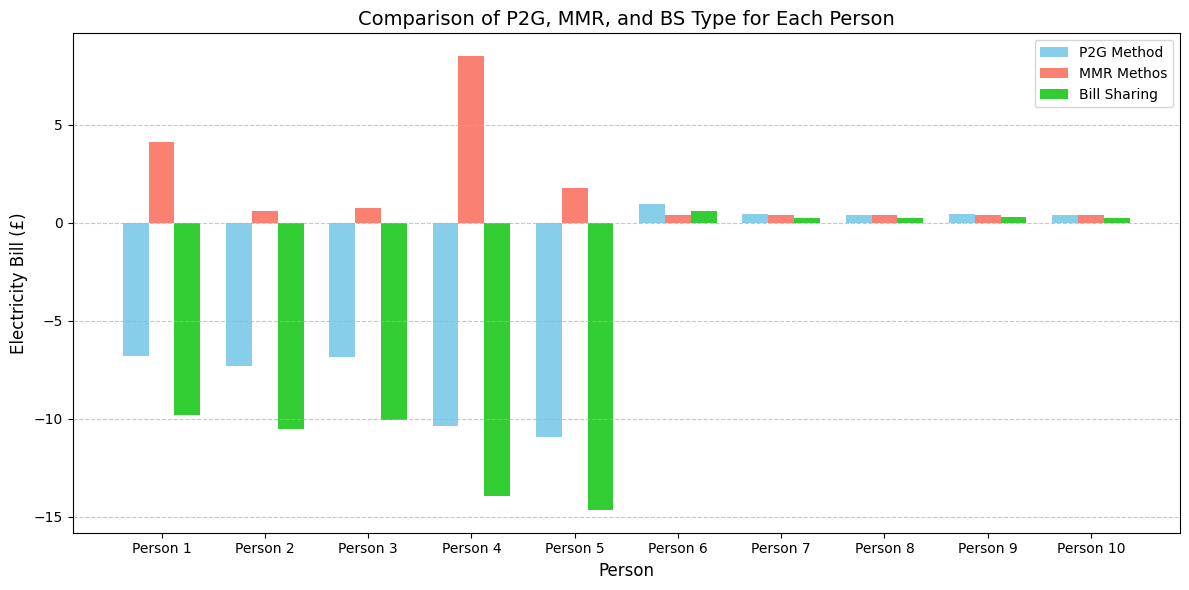

In [ ]:
# Visualization of comparison
persons = [f'Person {i}' for i in range(1, 11)]  # Names of individuals
x = np.arange(len(persons))  # x-axis positions for bar chart
bar_width = 0.25  # Adjusted width for three bars

plt.figure(figsize=(12, 6))

# Plot P2G bills
plt.bar(x - bar_width, bills, width=bar_width, label='P2G Method', color='skyblue')

# Plot MMR bills
plt.bar(x, bills_mmr, width=bar_width, label='MMR Methos', color='salmon')

# Plot the third bill type
plt.bar(x + bar_width, bills_isp_ibp, width=bar_width, label='Bill Sharing', color='limegreen')

# Add labels, title, and legend
plt.xlabel('Person', fontsize=12)
plt.ylabel('Electricity Bill (£)', fontsize=12)
plt.title('Comparison of P2G, MMR, and BS Type for Each Person', fontsize=14)
plt.xticks(x, persons, rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optimize layout and show plot
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

# Define the directory path where models will be saved
save_dir = '/content/drive/MyDrive/saved_models/'

# Loop through each model and save it
model_rad.save(f'{save_dir}solar_model.h5')
model_wind.save(f'{save_dir}wind_model.h5')
model_temp.save(f'{save_dir}temp_model.h5')
for i in range(1, 11):
    model = globals()[f'model_PCP{i}'] # Access model_PCP1, model_PCP2, ..., model_PCP10
    model.save(f'{save_dir}model_PCP{i}.h5')